# Output File Analysis - Multiple SRRs - Donor to Recipient Workflows

This notebooks analyses the crossing of reads between a Human and a Donor, looking for putative insertions. When mapping thousands of reads, one would expect to find the reads to fall on a rolling window over the putative read that should look like what we see below.

Donor: https://www.ncbi.nlm.nih.gov/nuccore/AF033819.3?report=fasta Recipient: https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/

Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4136300
Data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE53993

## Variables

For convenience, there might be more than one set of samples in the cells below. If so, note that the order matters, and only the last cell will be relevant, as the previous ones will be overwritten

In [16]:
## Variables
srr_names <- c("SRR1106189", "SRR1106190", "SRR1106191", "SRR1106192", 
               "SRR1106193", "SRR1106194", "SRR1106195", "SRR1106196", 
               "SRR1106197", "SRR1106198", "SRR1106199", "SRR1106200", 
               "SRR1106201", "SRR1106203", "SRR1106204")
donor_name <- "hiv1"
recipient_name <- "UCSChg38"
inputs_folder <- "../../wallaby/workflows/outputs/hiv1_rnaseq"
donor_ref_genome <- "../../wallaby/data/ref_genomes/hiv/HIV1.fa"
recipient_ref_genome <- "../../wallaby/data/ref_genomes/human/hg38.fa"

## Setup Environment

In [17]:
# Source external functions
source("srrs_util.R")

In [3]:
# Load libraries and setup multithreading
setup_enviroment()

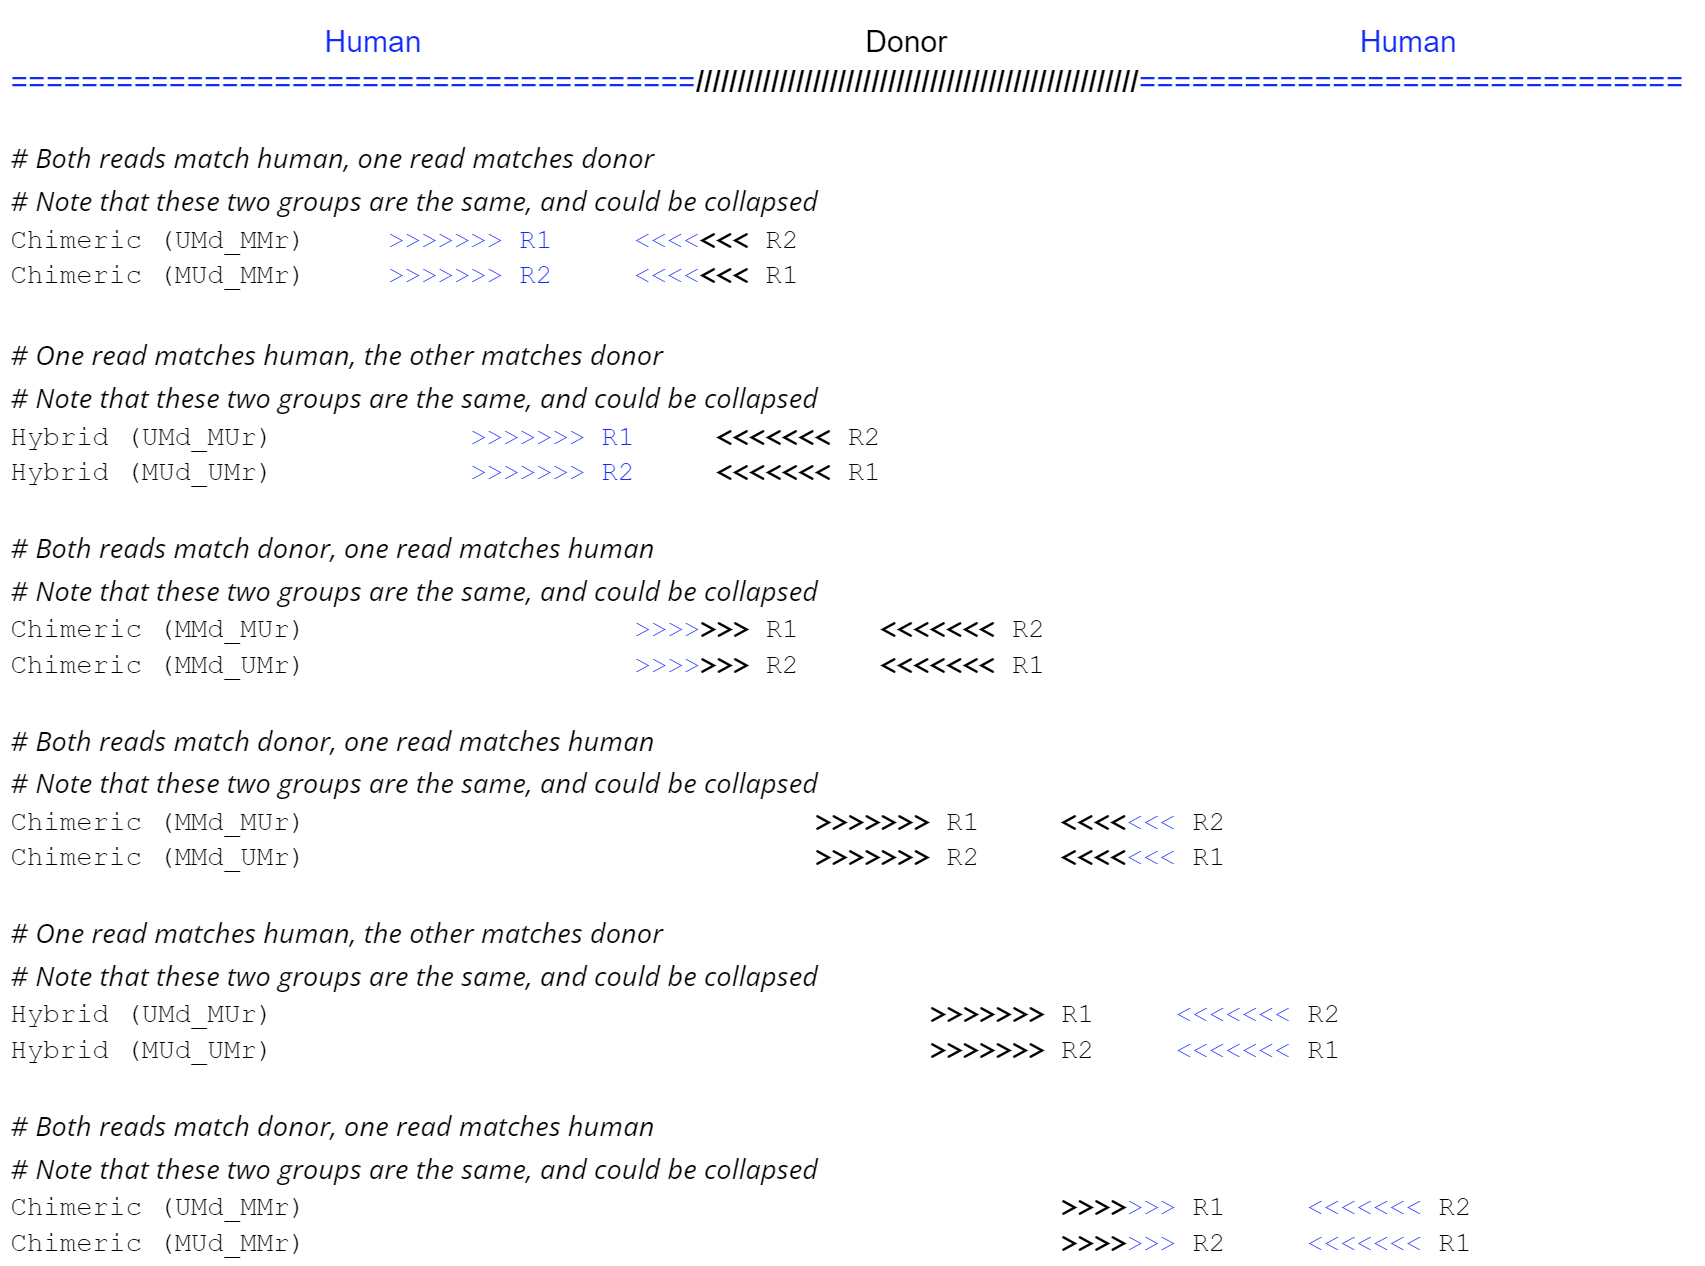

In [4]:
# Display rolling window diagram
display_png(file="reading_window.png")

In [5]:
# Select crossings to import and order of visualization
crossings <- c("UMd_MMr", "MUd_MMr", "UMd_MUr", "MUd_UMr", "MMd_UMr", "MMd_MUr")

In [6]:
# Load all .bed files for all srrs created by the cromwell workflow
donor_granges_all_srrs <- load_beds(srr_names, crossings, donor_name)
recip_granges_all_srrs <- load_beds(srr_names, crossings, recipient_name)

In [7]:
# Load recipient .bam files created by the cromwell workflow
recip_bams_all_srrs <- load_bams(srr_names, crossings, recipient_name)

In [8]:
# Create a sqlite database from TxDb and corresponding Org packages
# The database provides a convenient way to map between gene, transcript, and protein identifiers.
src <- suppressMessages(suppressWarnings(src_organism("TxDb.Hsapiens.UCSC.hg38.knownGene")))
# Create a full genome sequences for Homo sapiens as provided by UCSC (hg38, based on GRCh38.p12)
Hsapiens <- BSgenome.Hsapiens.UCSC.hg38

## Donor Analysis

In [9]:
# Aggregated view of all overlapping crossings for the potential donor for all srrs
srrs_summary_table <- srrs_summary_table_donor (granges_list = donor_granges_all_srrs, 
                                                min_num_crossings = 2,
                                                min_num_reads = 20)

srr,id,chr,start,stop,num_crossings,unique_crossings,num_reads
SRR1106189,1,AF033819.3,2,9181,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",3992
SRR1106190,1,AF033819.3,6,6911,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",2279
SRR1106190,2,AF033819.3,6913,9181,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",419
SRR1106191,1,AF033819.3,1,9181,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",6571
SRR1106192,1,AF033819.3,1,9181,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",35630
SRR1106193,1,AF033819.3,1,9181,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",17468
SRR1106194,1,AF033819.3,1,9181,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",25587
SRR1106195,<NA>,<NA>,0,0,0,<NA>,0
SRR1106196,<NA>,<NA>,0,0,0,<NA>,0
SRR1106197,<NA>,<NA>,0,0,0,<NA>,0


## Recipient Analysis

In [12]:
# Aggregated view of all overlapping crossings for the potential recipient for all srrs
srrs_summary_table <- srrs_summary_table_recipient (granges_list = recip_granges_all_srrs, 
                                                    min_num_crossings = 2,
                                                    min_num_reads = 50, 
                                                    src = src,
                                                    Hsapiens = Hsapiens)

srr,id,chr,start,stop,num_crossings,unique_crossings,num_reads,gene_name,sequence
SRR1106189,<NA>,<NA>,0,0,0,<NA>,0,<NA>,<NA>
SRR1106190,<NA>,<NA>,0,0,0,<NA>,0,<NA>,<NA>
SRR1106191,1,chrM,2106,2548,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",57,,AGGAACAGCTCTTTGGACACTAGGAAAAAACCTTGTAGAGAGAGTAAAAAATTTAACACCCATAGTAGGCCTAAAAGCAGCCACCAATTAAGAAAGCGTTCAAGCTCAACACCCACTACCTAAAAAATCCCAAACATATAACTGAACTCCTCACACCCAATTGGACCAATCTATCACCCTATAGAAGAACTAATGTTAGTATAAGTAACATGAAAACATTCTCCTCCGCATAAGCCTGCGTCAGATTAAAACACTGAACTGACAATTAACAGCCCAATATCTACAATCAACCAACAAGTCATTATTACCCTCACTGTCAACCCAACACAGGCATGCTCATAAGGAAAGGTTAAAAAAAGTAAAAGGAACTCGGCAAATCTTACCCCGCCTGTTTACCAAAAACATCACCTCTAGCATCACCAGTATTAGAGGCACCGCCTGCC
SRR1106192,1,chr14,49586589,49586872,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",57,"RN7SL1, RPS29",GGTGGCGCGTGCCTGTAGTCCCAGCTACTCGGGAGGCTGAGGCTGGAGGATCGCTTGAGTCCAGGAGTTCTGGGCTGTAGTGCGCTATGCCGATCGGGTGTCCGCACTAAGTTCGGCATCAATATGGTGACCTCCCGGGAGCGGGGGACCACCAGGTTGCCTAAGGAGGGGTGAACCGGCCCAGGTCGGAAACGGAGCAGGTCAAAACTCCCGTGCTGATCAGTAGTGGGATCGCGCCTGTGAATAGCCACTGCACTCCAGCCTGGGCAACATAGCGAGACCCC
SRR1106192,2,chr21,8213882,8214139,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",83,LOC100507412,CCGAGACGCGACCTCAGATCAGACGTGGCGACCCGCTGAATTTAAGCATATTAGTCAGCGGAGGAAAAGAAACTAACCAGGATTCCCTCAGTAACGGCGAGTGAACAGGGAAGAGCCCAGCGCCGAATCCCCGCCCCGCGGCGGGGCGCGGGACATGTGGCGTACGGAAGACCCGCTCCCCGGCGCCGCTCGTGGGGGGCCCAAGTCCTTCTGATCGAGGCCCAGCCCGTGGACGGTGTGAGGCCGGTAGCGGCCCCC
SRR1106192,3,chr21,8396932,8397139,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",75,LOC100507412,CTCAGATCAGACGTGGCGACCCGCTGAATTTAAGCATATTAGTCAGCGGAGGAAAAGAAACTAACCAGGATTCCCTCAGTAACGGCGAGTGAACAGGGAAGAGCCCAGCGCCGAATCCCCGCCCCGCGGCGGGGCGCGGGACATGTGGCGTACGGAAGACCCGCTCCCCGGCGCCGCTCGTGGGGGGCCCAAGTCCTTCTGATCGAGG
SRR1106192,4,chr21,8441089,8441359,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",94,LOC100507412,GTCGGGCCGGCGCGATTCCGTCCGTCCGTCCGCCGAGCGGCCCGTCCCCCTCCGAGACGCGACCTCAGATCAGACGTGGCGACCCGCTGAATTTAAGCATATTAGTCAGCGGAGGAGAAGAAACTAACCAGGATTCCCTCAGTAACGGCGAGTGAACAGGGAAGAGCCCAGCGCCGAATCCCCGCCCCGCGGCGGGGCGCGGGACATGTGGCGTACGGAAGACCCGCTCCCCGGCGCCGCTCGTGGGGGGCCCAAGTCCTTCTGATCGAGG
SRR1106192,5,chr21,8442475,8443241,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",70,LOC100507412,ACCAAGGAGTCTAACACGTGCGCGAGTCGGGGGCTCGCACGAAAGCCGCCGTGGCGCAATGAAGGTGAAGGCCGGCGCGCTCGCCGGCCGAGGTGGGATCCCGAGGCCTCTCCAGTCCGCCGAGGGCGCACCACCGGCCCGTCTCGCCCGCCGCGCCGGGGAGGTGGAGCACGAGCGCACGTGTTAGGACCCGAAAGATGGTGAACTATGCCTGGGCAGGGCGAAGCCAGAGGAAACTCTGGTGGAGGTCCGTAGCGGTCCTGACGTGCAAATCGGTCGTCCGACCTGGGTATAGGGGCGAAAGACTAATCGAACCATCTAGTAGCTGGTTCCCTCCGAAGTTTCCCTCAGGATAGCTGGCGCTCTCGCAGACCCGACGCACCCCCGCCACGCAGTTTTATCCGGTAAAGCGAATGATTAGAGGTCTTGGGGCCGAAACGATCTCAACCTATTCTCAAACTTTAAATGGGTAAGAAGCCCGGCTCGCTGGCGTGGAGCCGGGCGTGGAATGCGAGTGCCTAGTGGGCCACTTTTGGTAAGCAGAACTGGCGCTGCGGGATGAACCGAACGCCGGGTTAAGGCGCCCGATGCCGACGCTCATCAGACCCCAGAAAAGGTGTTGGTTGATATAGACAGCAGGACGGTGGCCATGGAAGTCGGAATCCGCTAAGGAGTGTGTAACAACTCACCTGCCGAATCAACTAGCCCTGAAAATGGATGGCGCTGGAGCGTCGGGCCCATACCCGGCCGTCGCCGGCAGTCGAGAG
SRR1106192,6,chr22_KI270733v1_random,130208,130398,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",84,,ACCTCAGATCAGACGTGGCGACCCGCTGAATTTAAGCATATTAGTCAGCGGAGGAGAAGAAACTAACCAGGATTCCCTCAGTAACGGCGAGTGAACAGGGAAGAGCCCAGCGCCGAATCCCCGCCCCGCGGCGGGGCGCGGGACATGTGGCGTACGGAAGACCCGCTCCCCGGCGCCGCTCGTGGGGGGCC
SRR1106192,7,chr22_KI270733v1_random,175283,175498,6,"UMd_MMr, MUd_MMr, UMd_MUr, MUd_UMr, MMd_UMr, MMd_MUr",89,,CGCGACCTCAGATCAGACGTGGCGACCCGCTGAATTTAAGCATATTAGTCAGCGGAGGAGAAGAAACTAACCAGGATTCCCTCAGTAACGGCGAGTGAACAGGGAAGAGCCCAGCGCCGAATCCCCGCCCCGCGGCGGGGCGCGGGACATGTGGCGTACGGAAGACCCGCTCCCCGGCGCCGCTCGTGGGGGGCCCAAGTCCTTCTGATCGAGGCC


## Donor and Recipient Graphs

### SRR1106191

#### Donor reads density graph

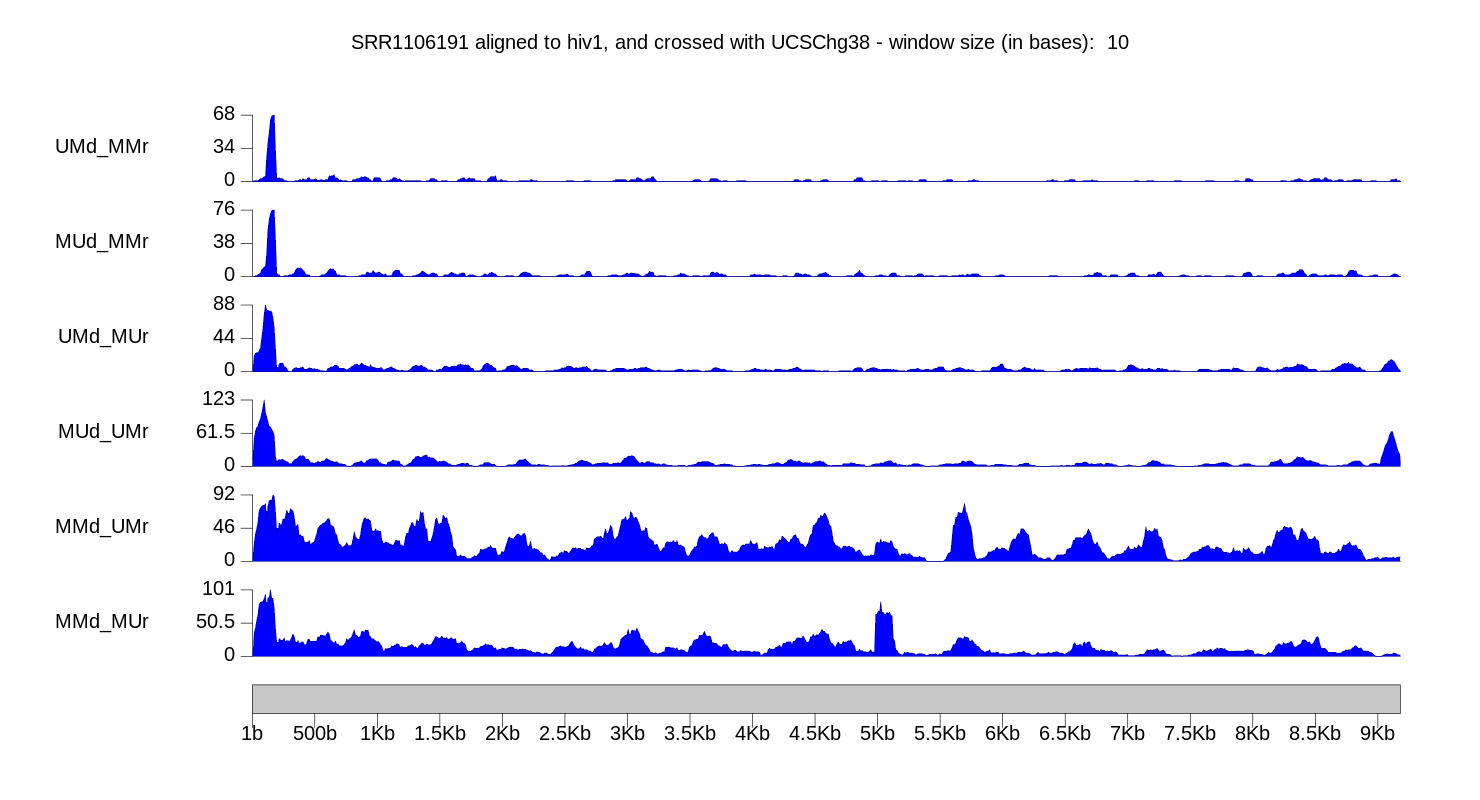

#### Recipient reads density graph

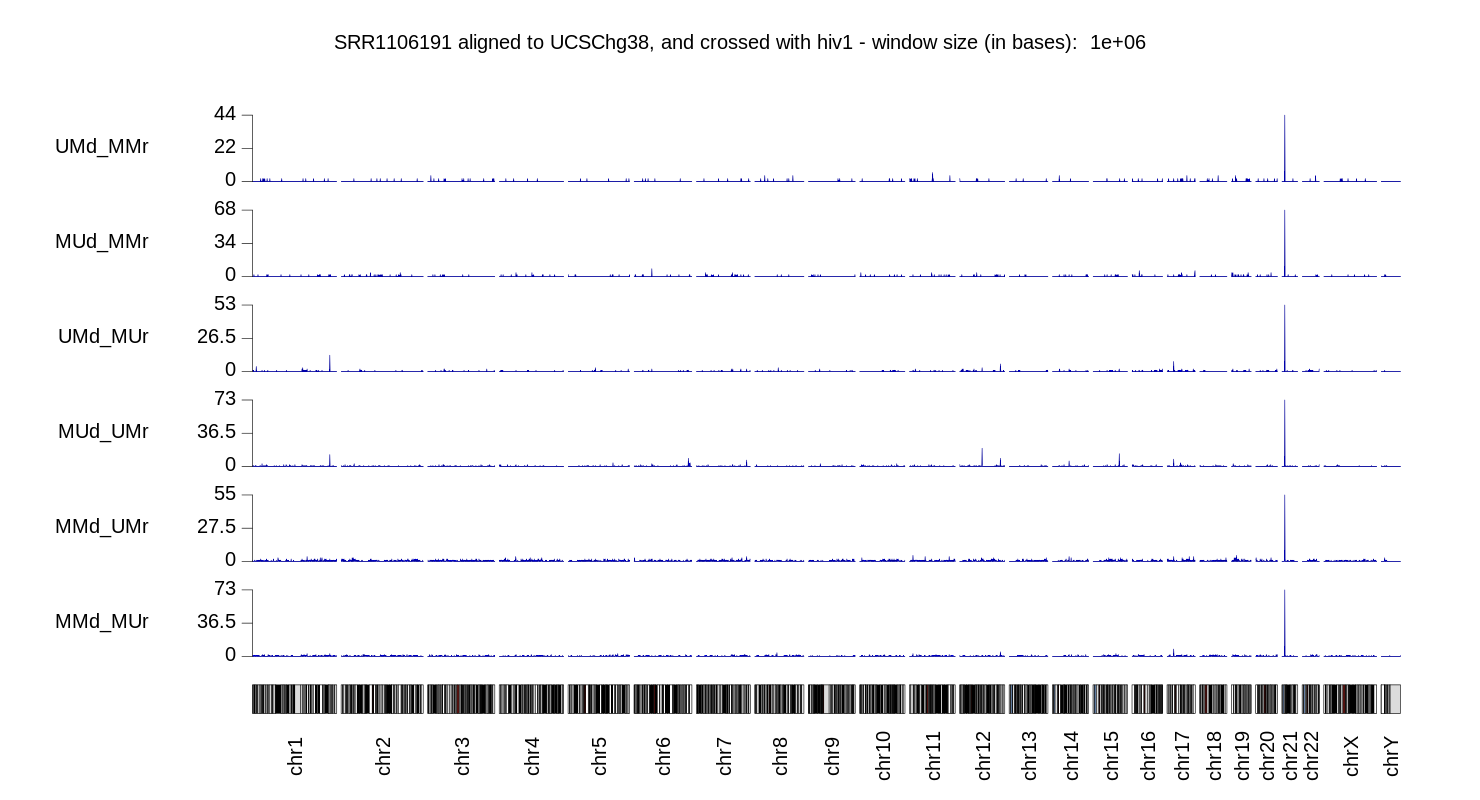

#### Crossings overlap graph - Putative insertion site

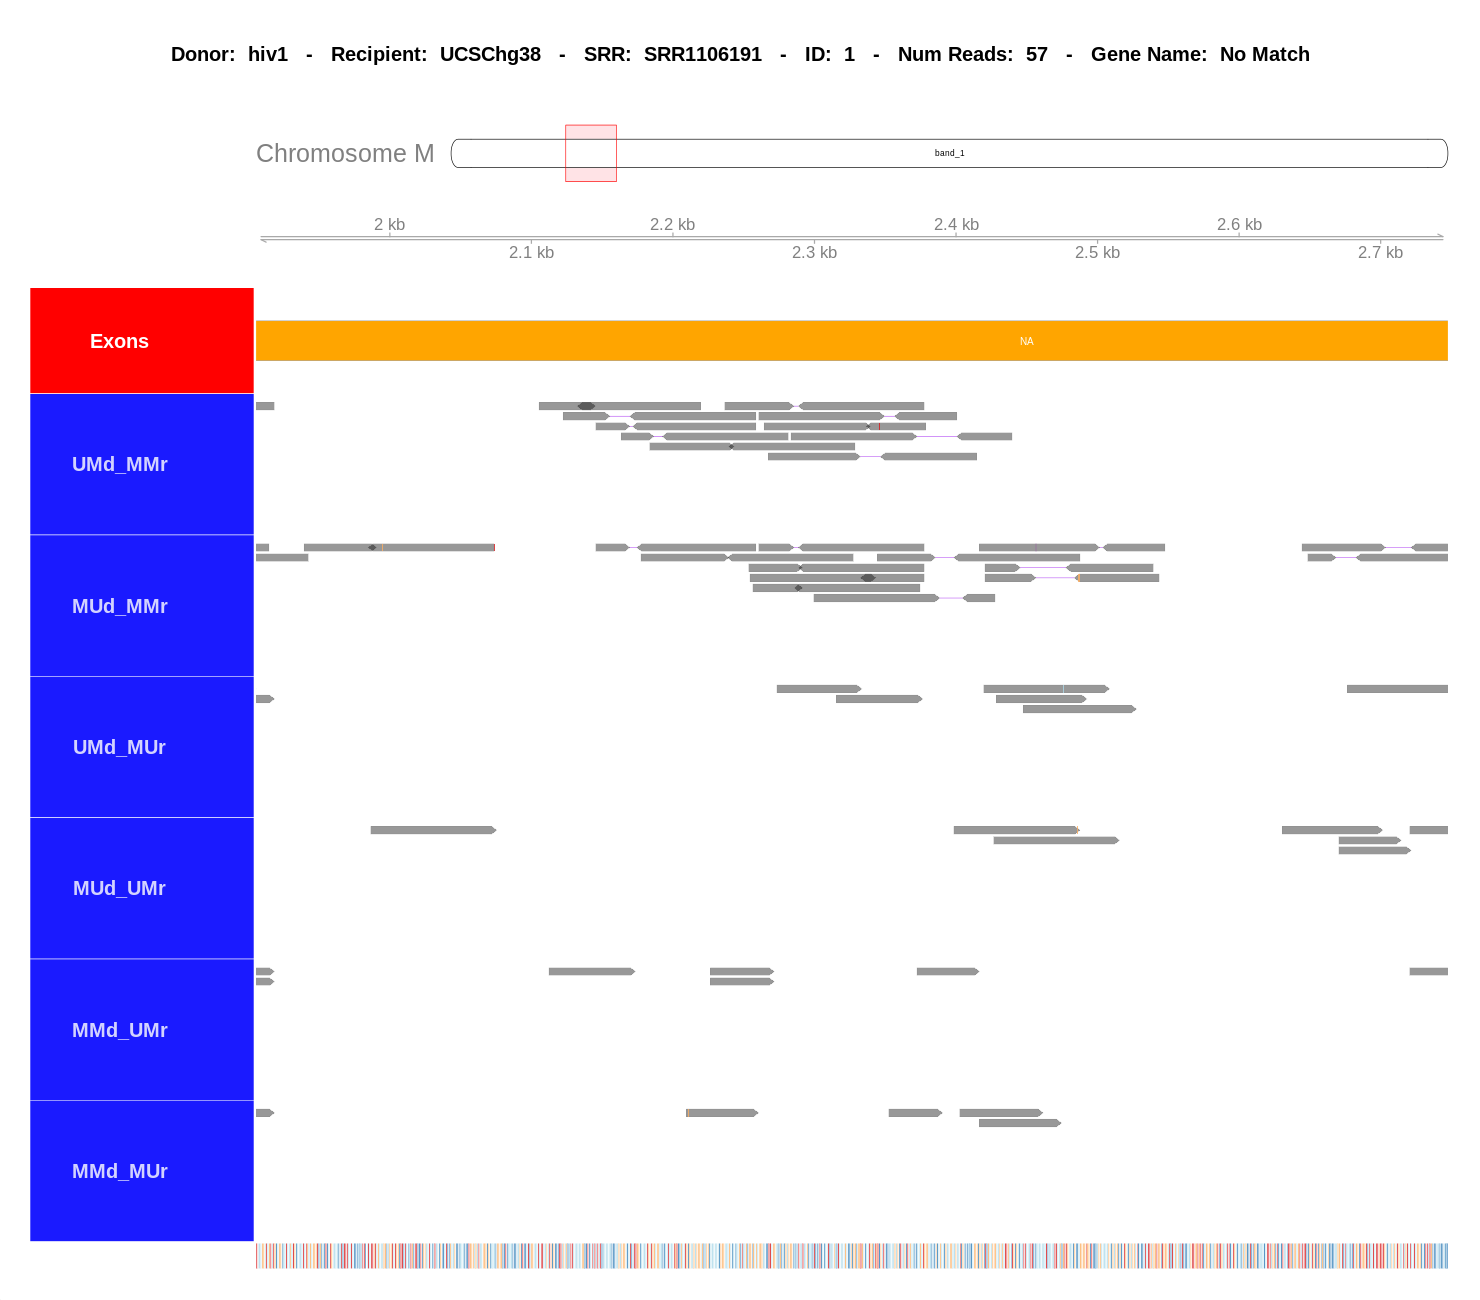

### SRR1106192

#### Donor reads density graph

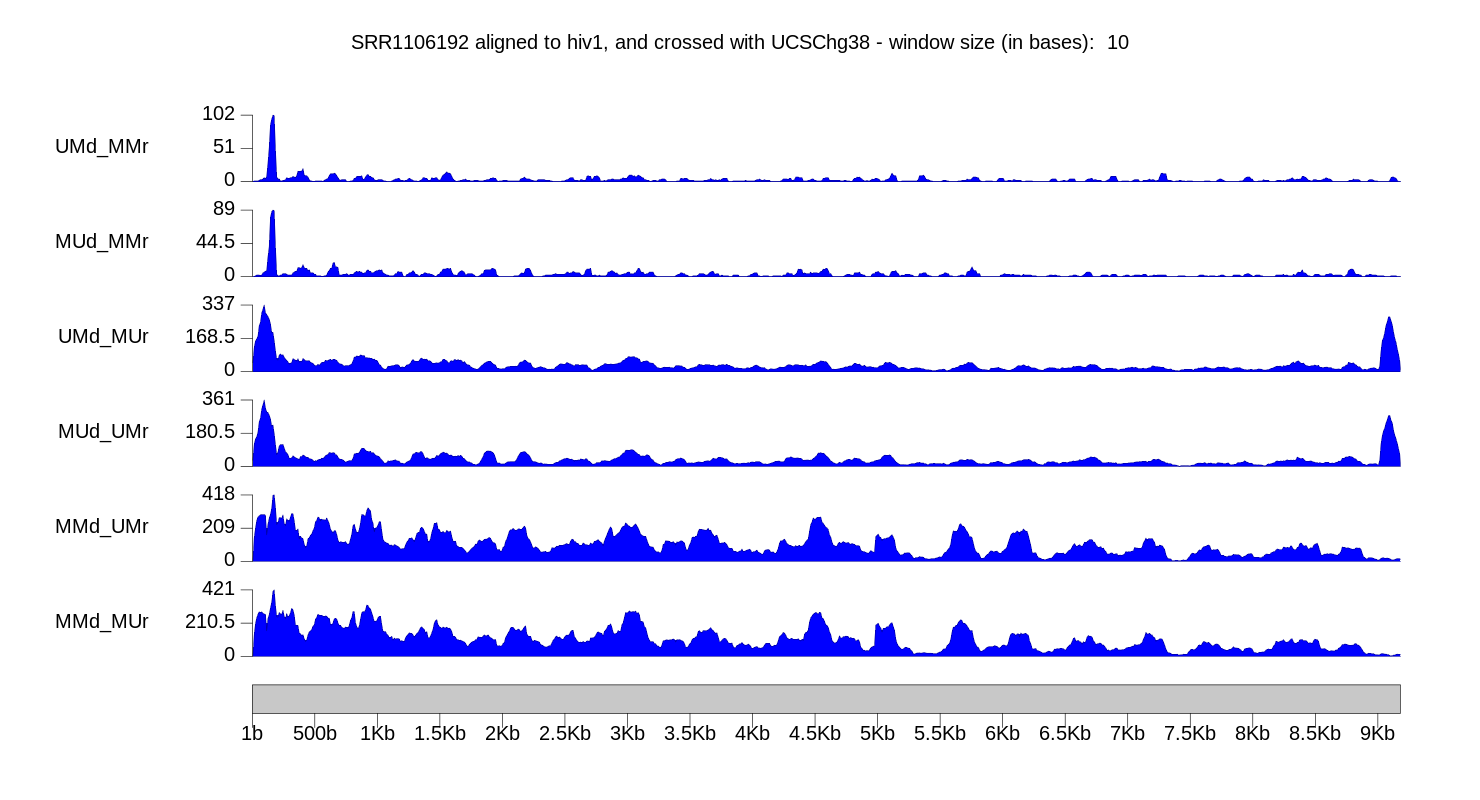

#### Recipient reads density graph

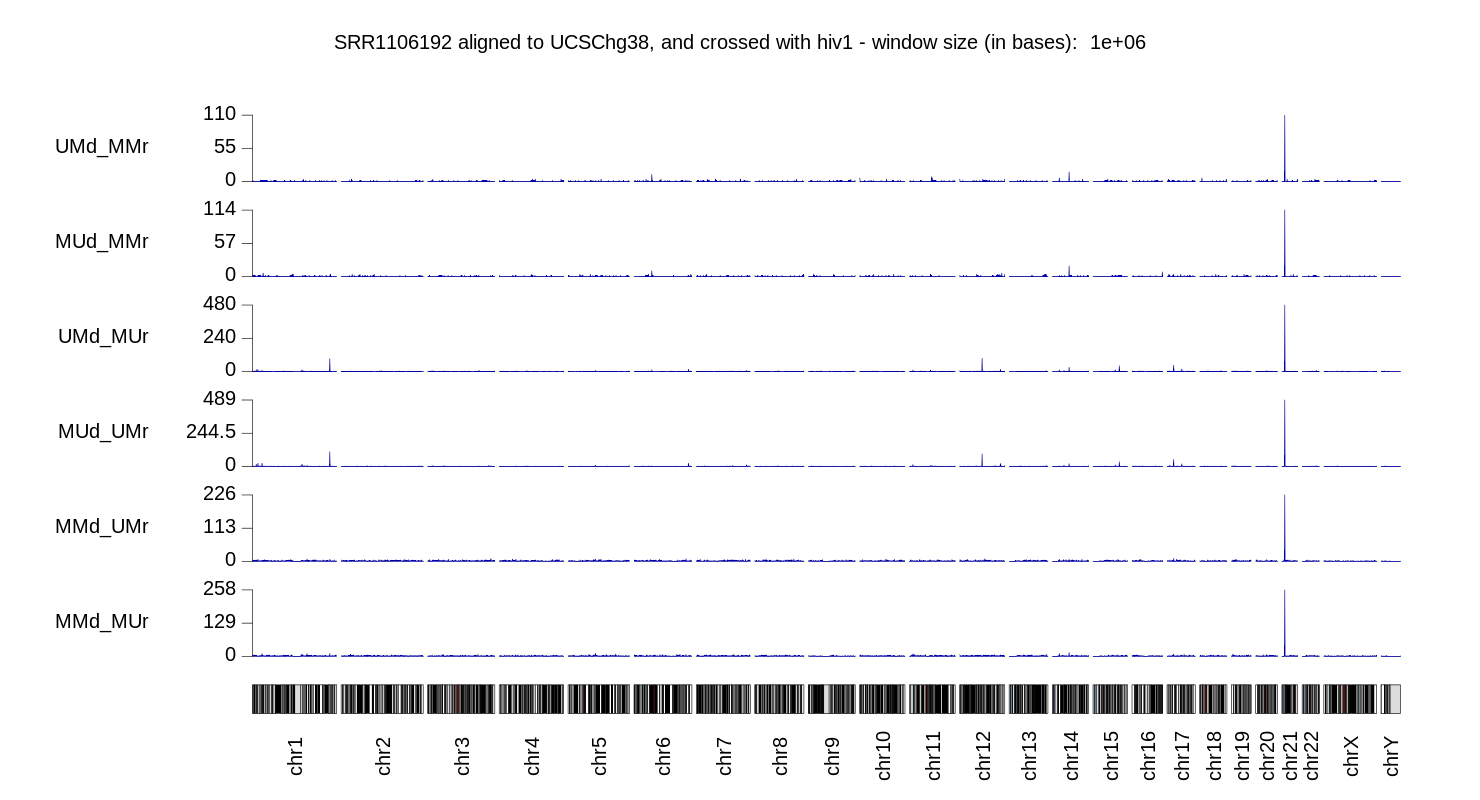

#### Crossings overlap graph - Putative insertion site

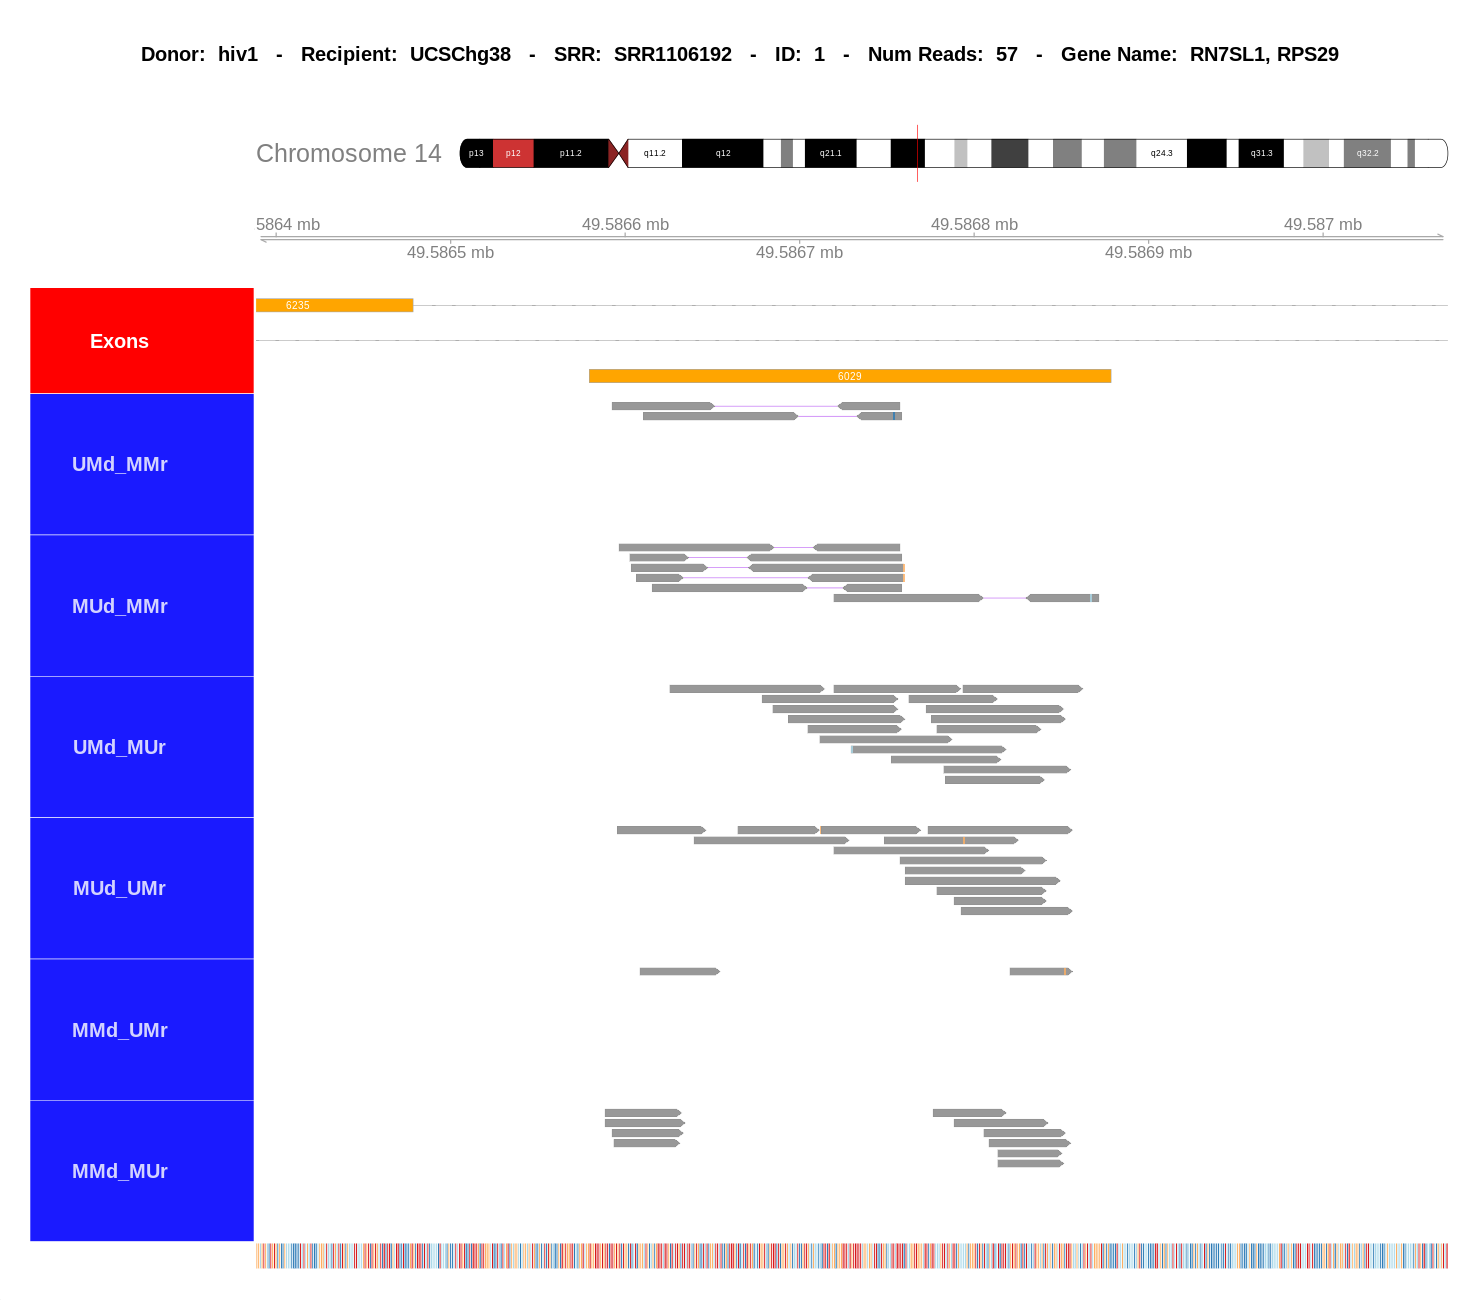

#### Crossings overlap graph - Putative insertion site

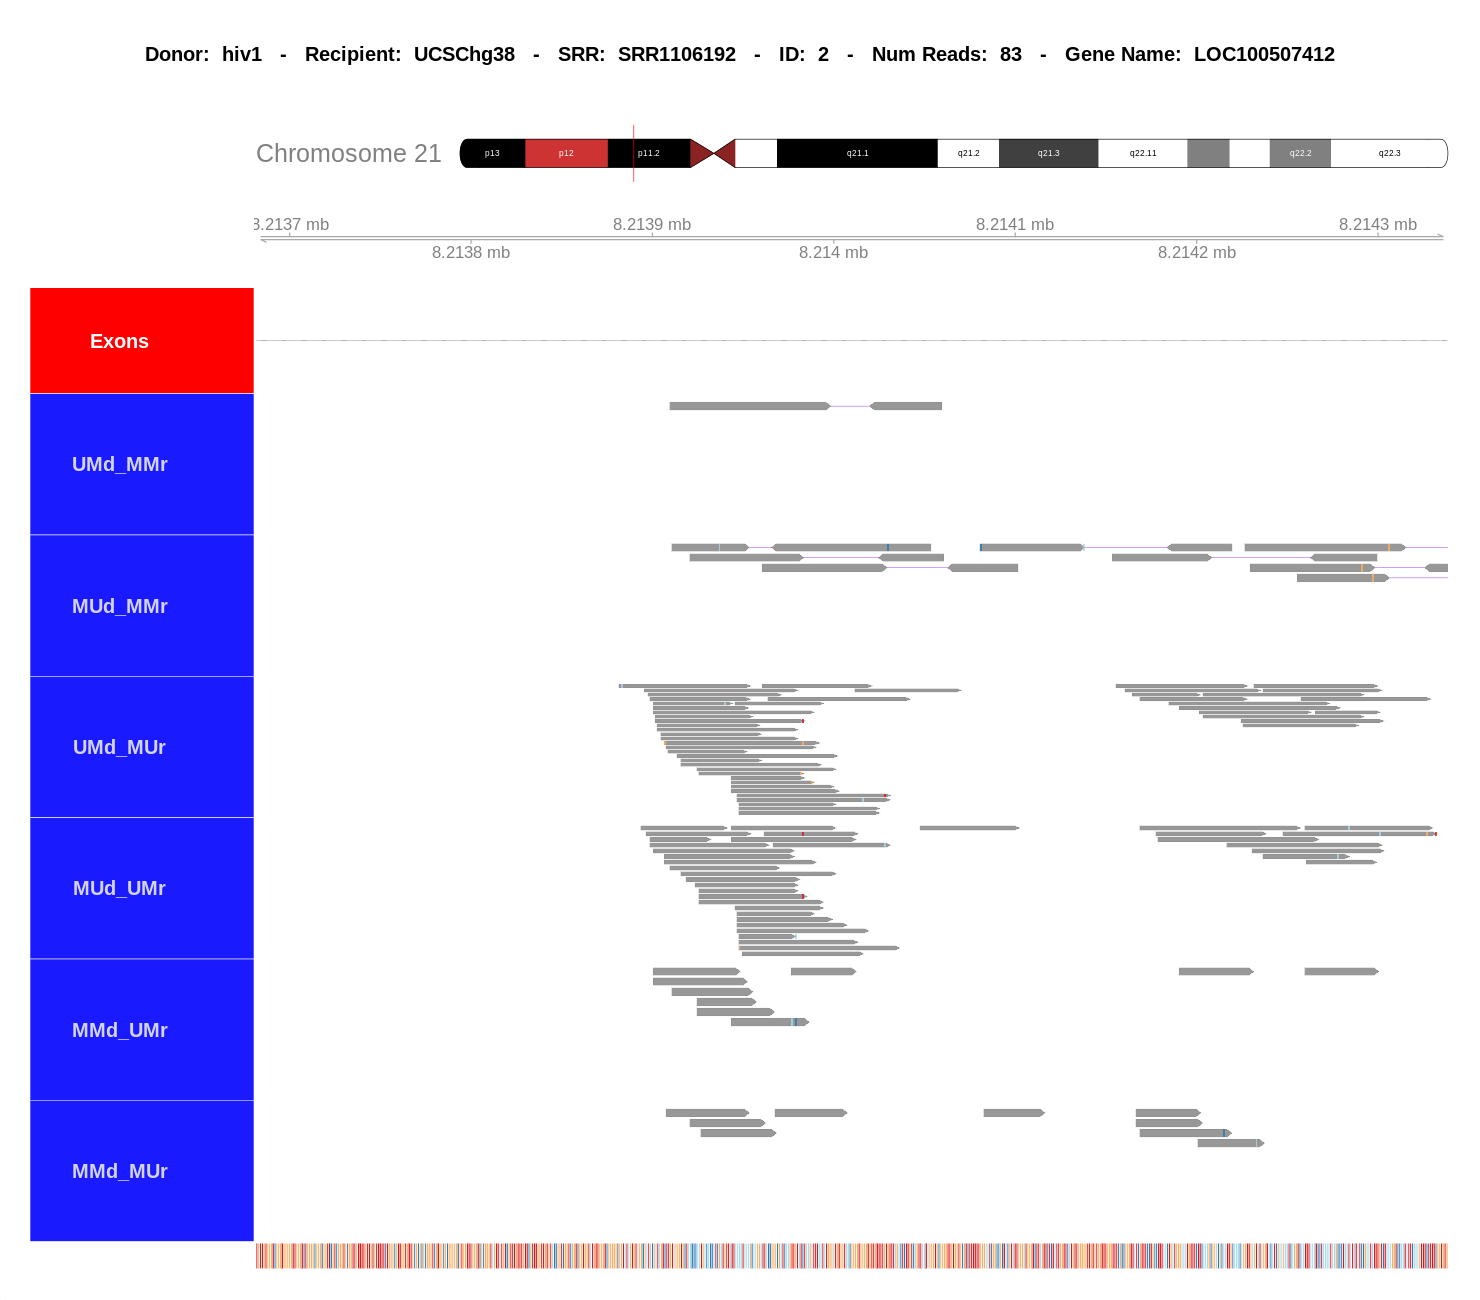

#### Crossings overlap graph - Putative insertion site

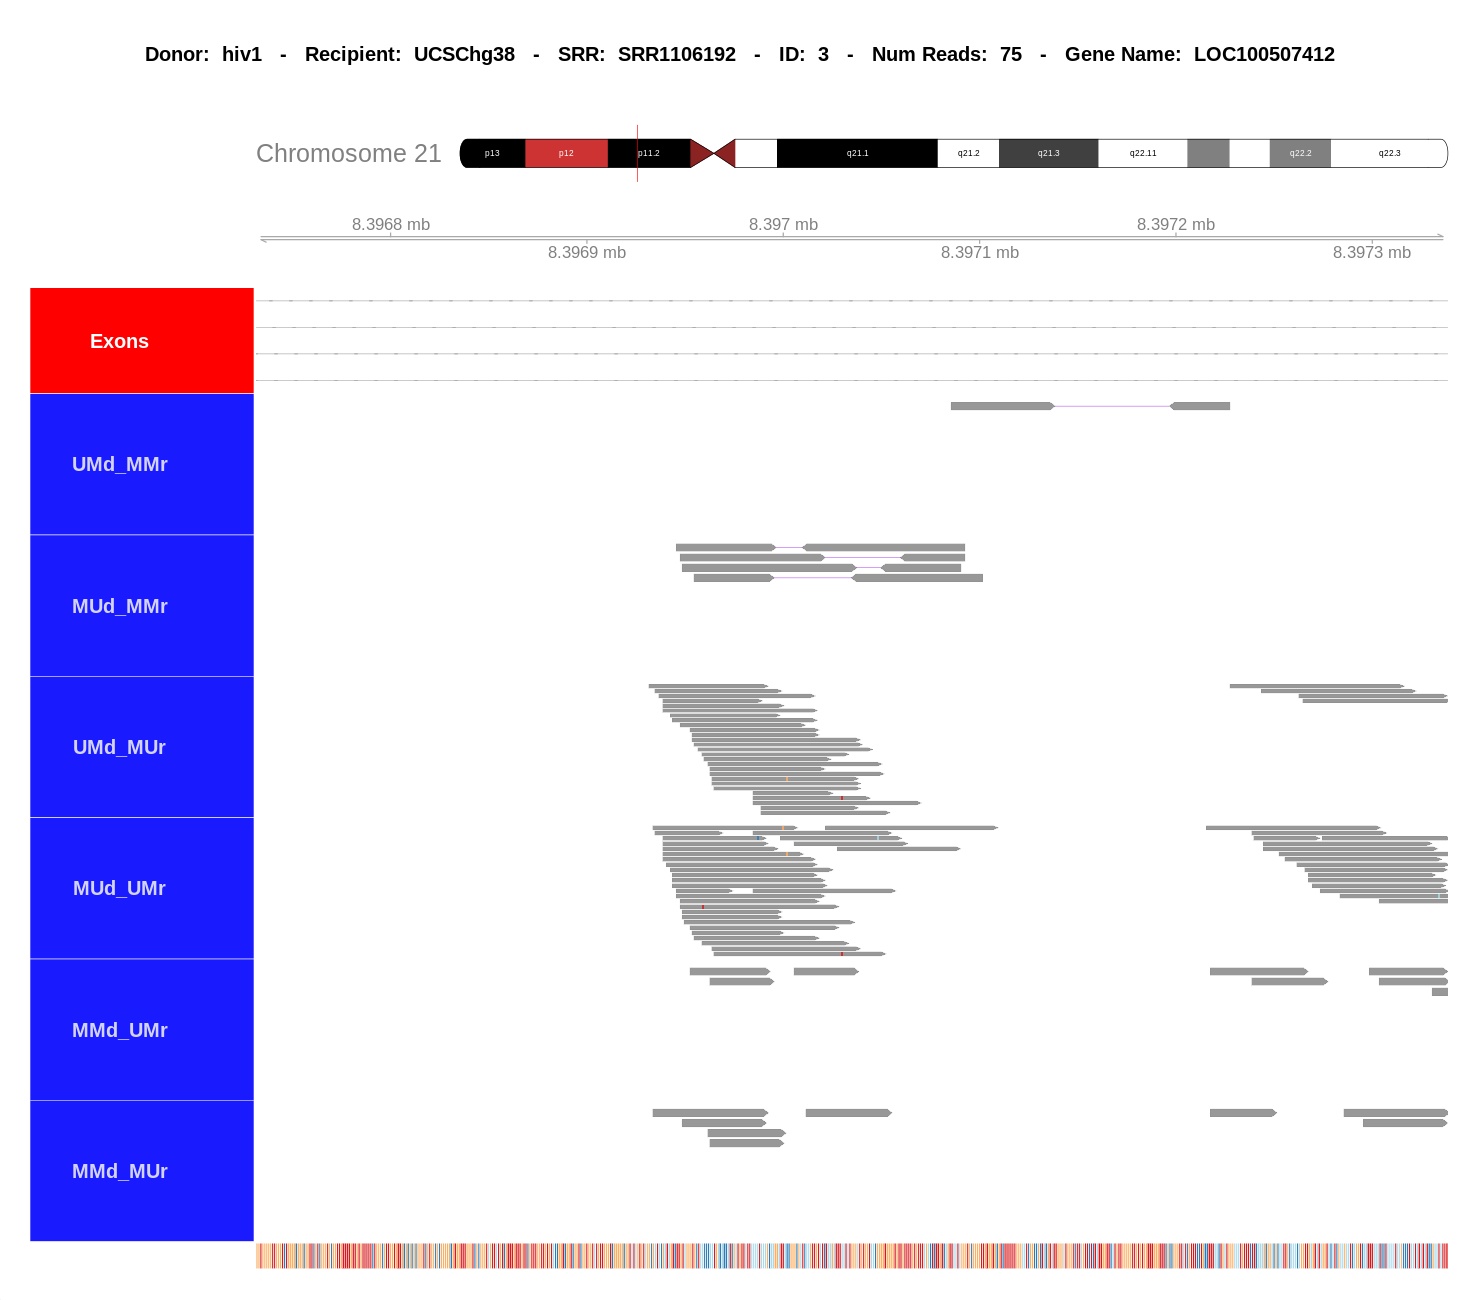

#### Crossings overlap graph - Putative insertion site

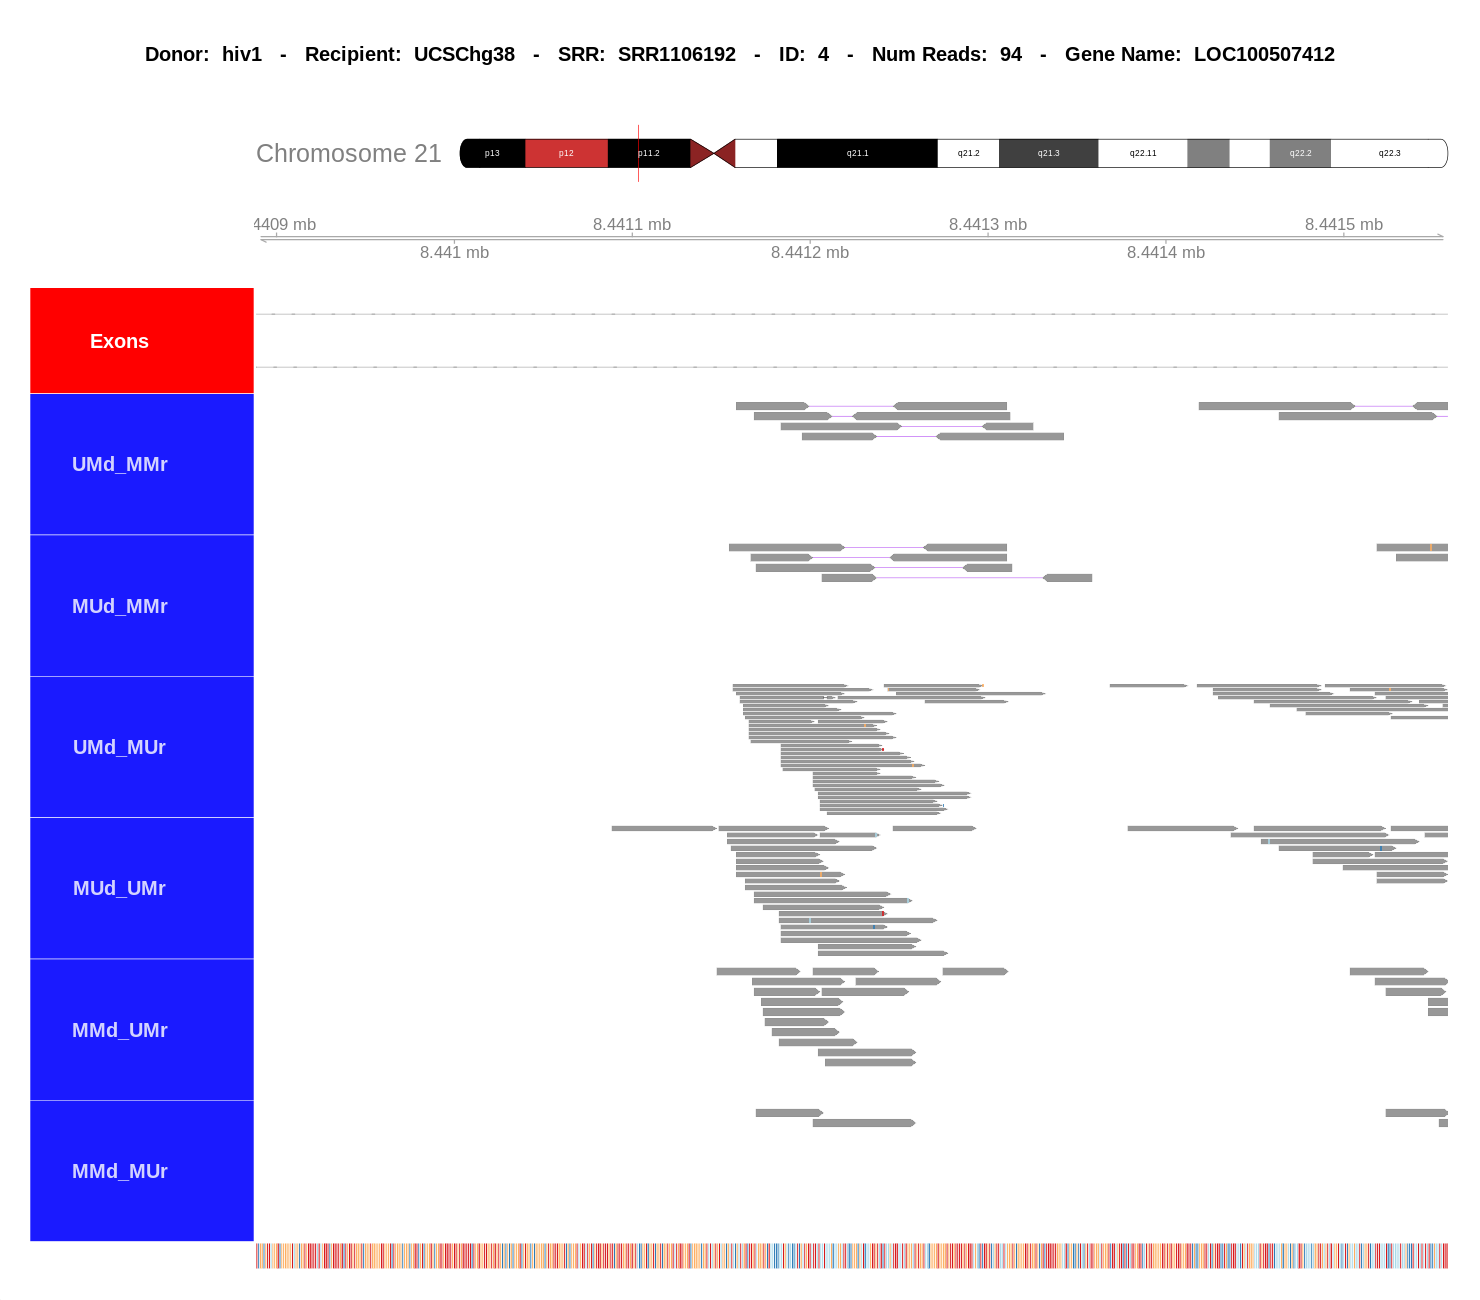

#### Crossings overlap graph - Putative insertion site

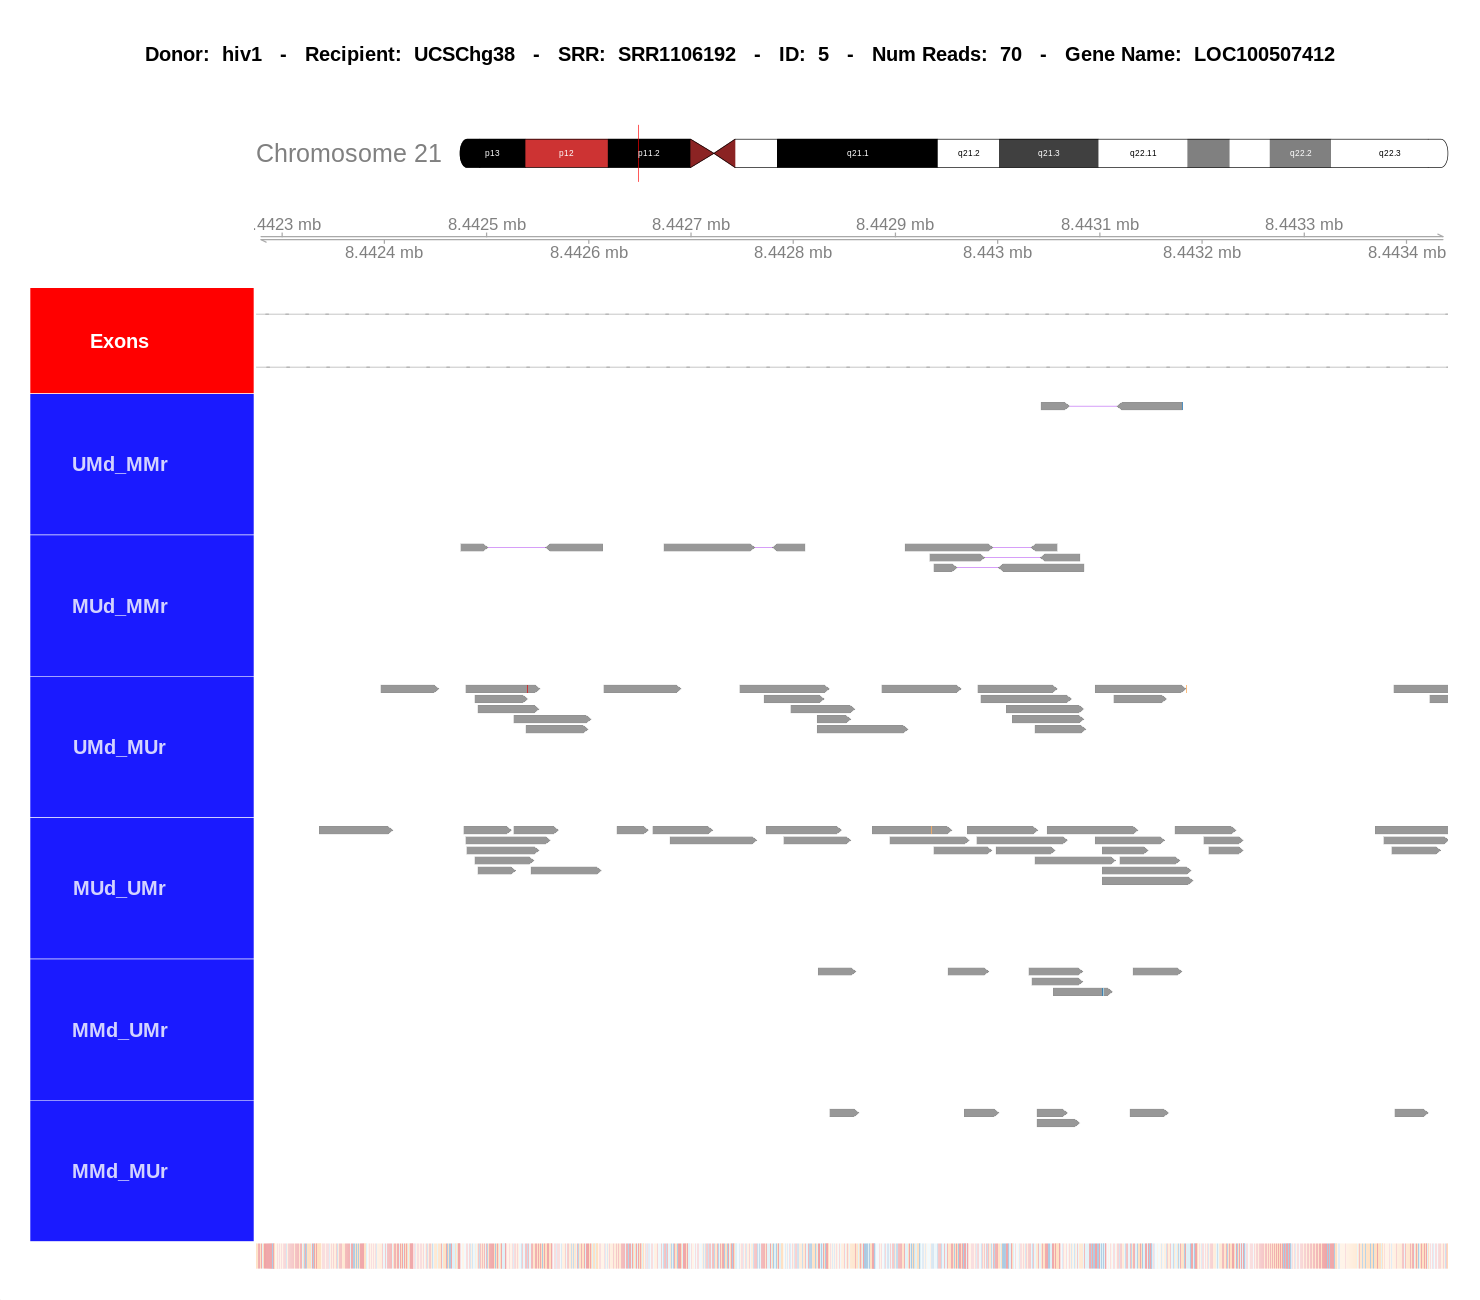

#### Crossings overlap graph - Putative insertion site

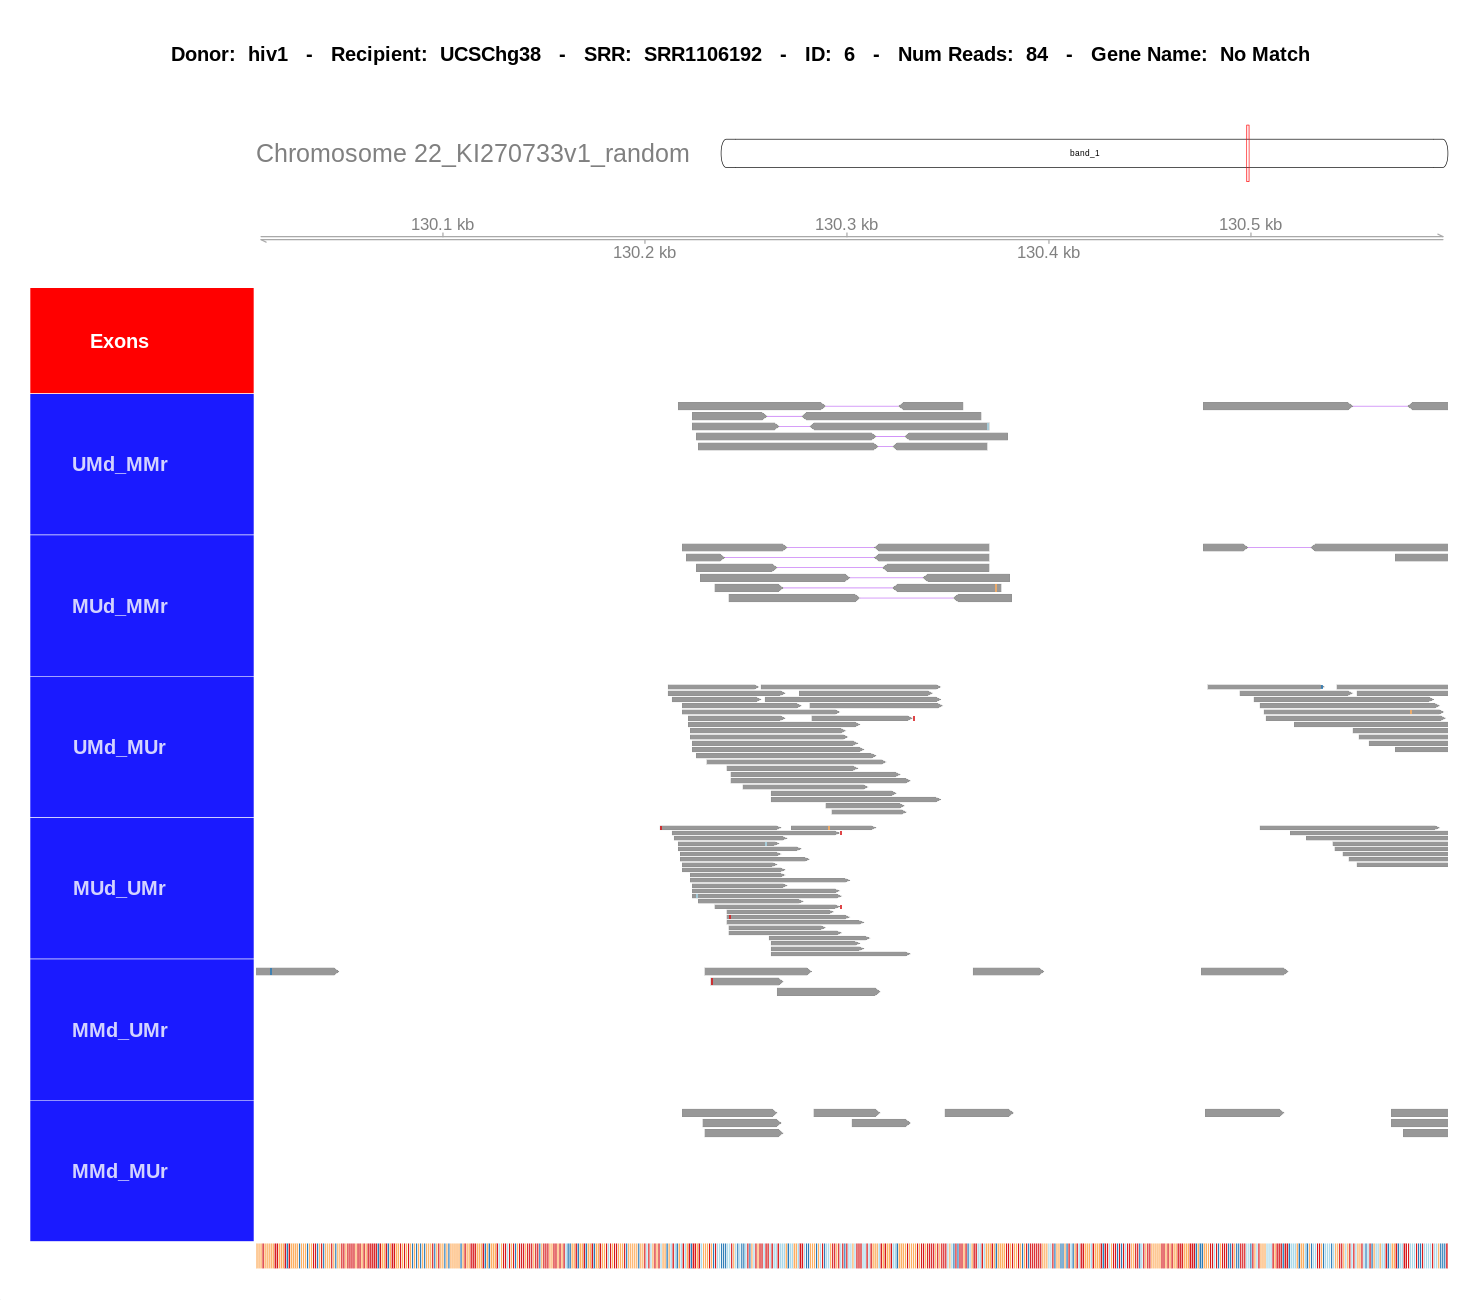

#### Crossings overlap graph - Putative insertion site

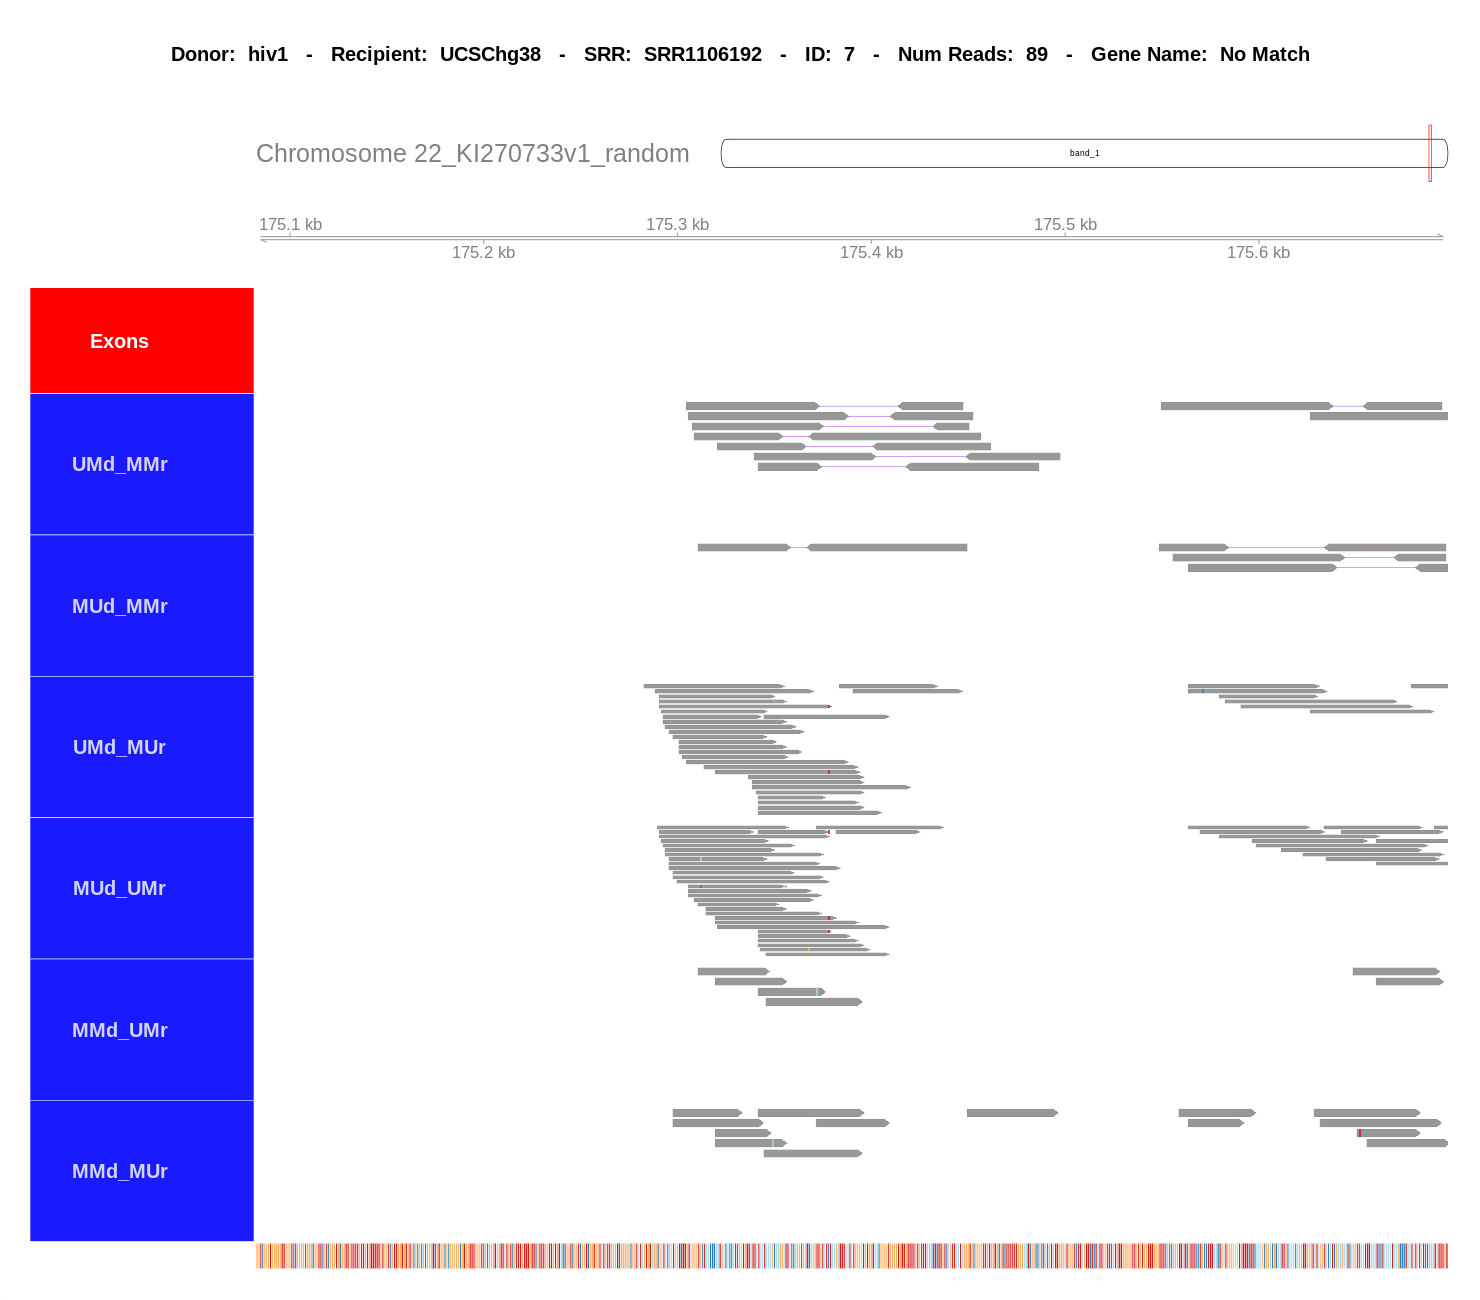

#### Crossings overlap graph - Putative insertion site

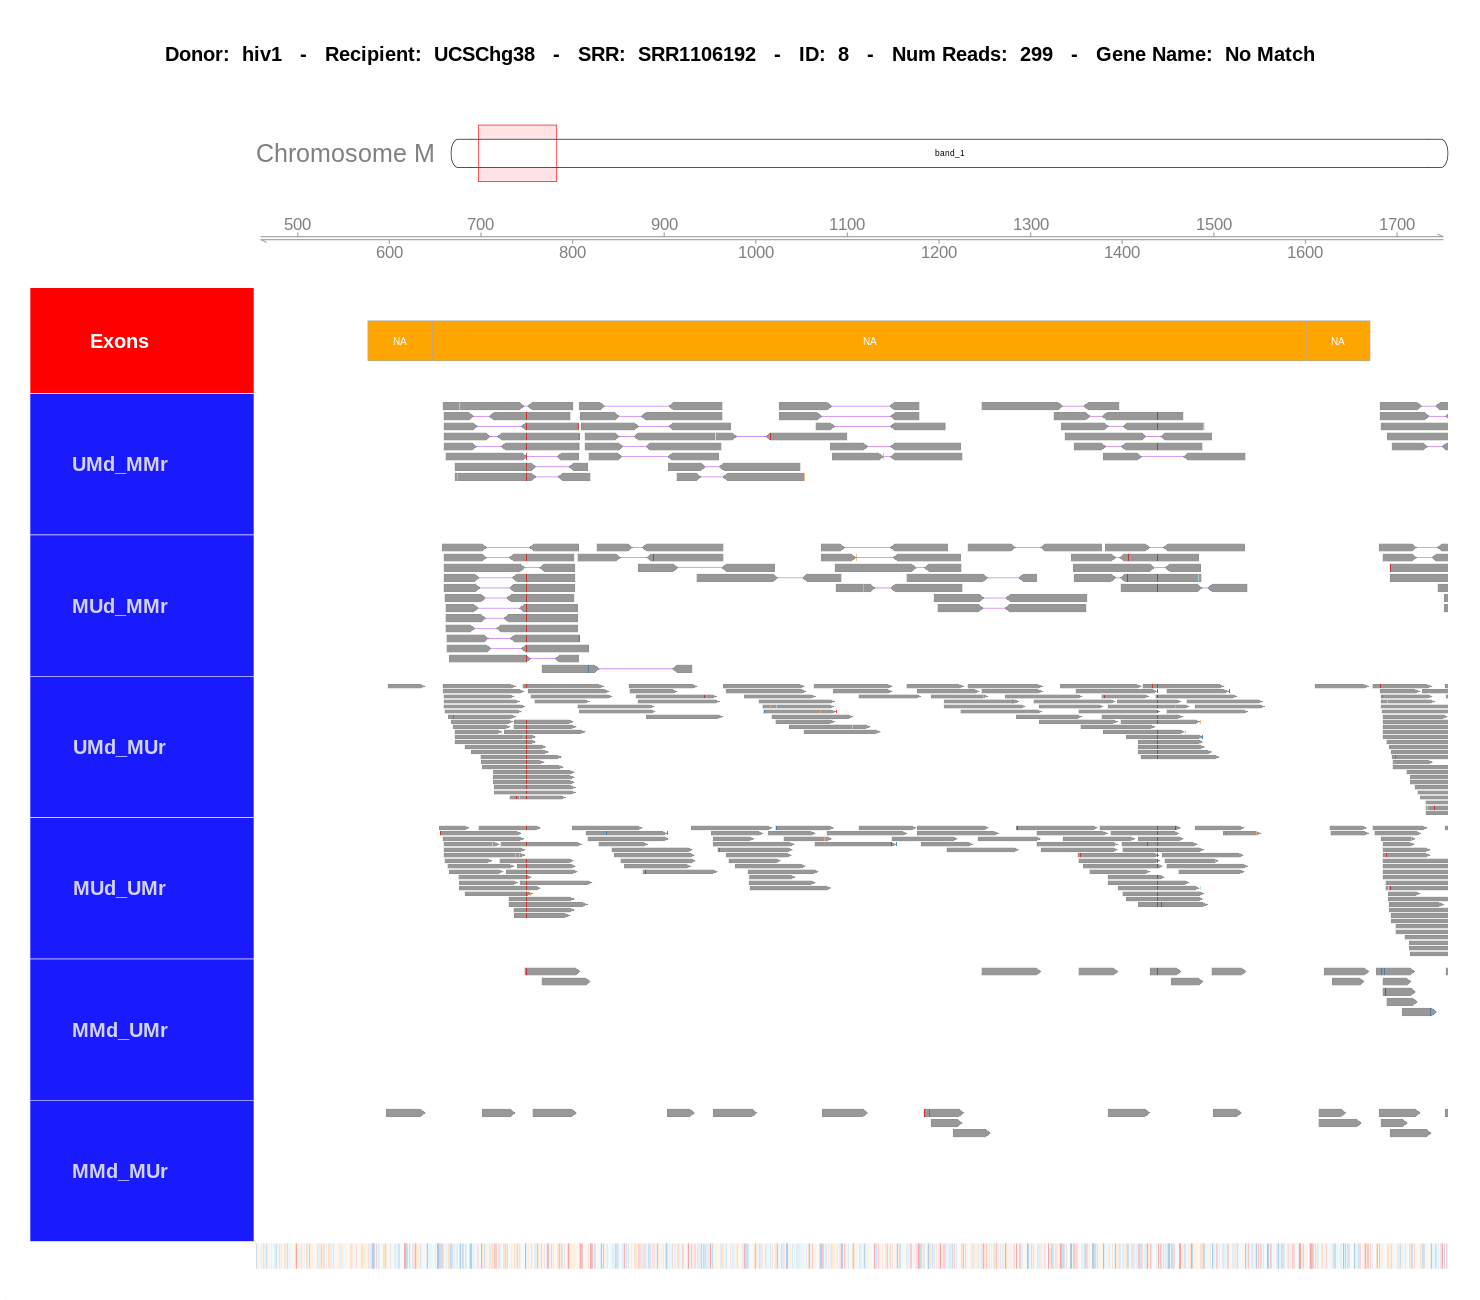

#### Crossings overlap graph - Putative insertion site

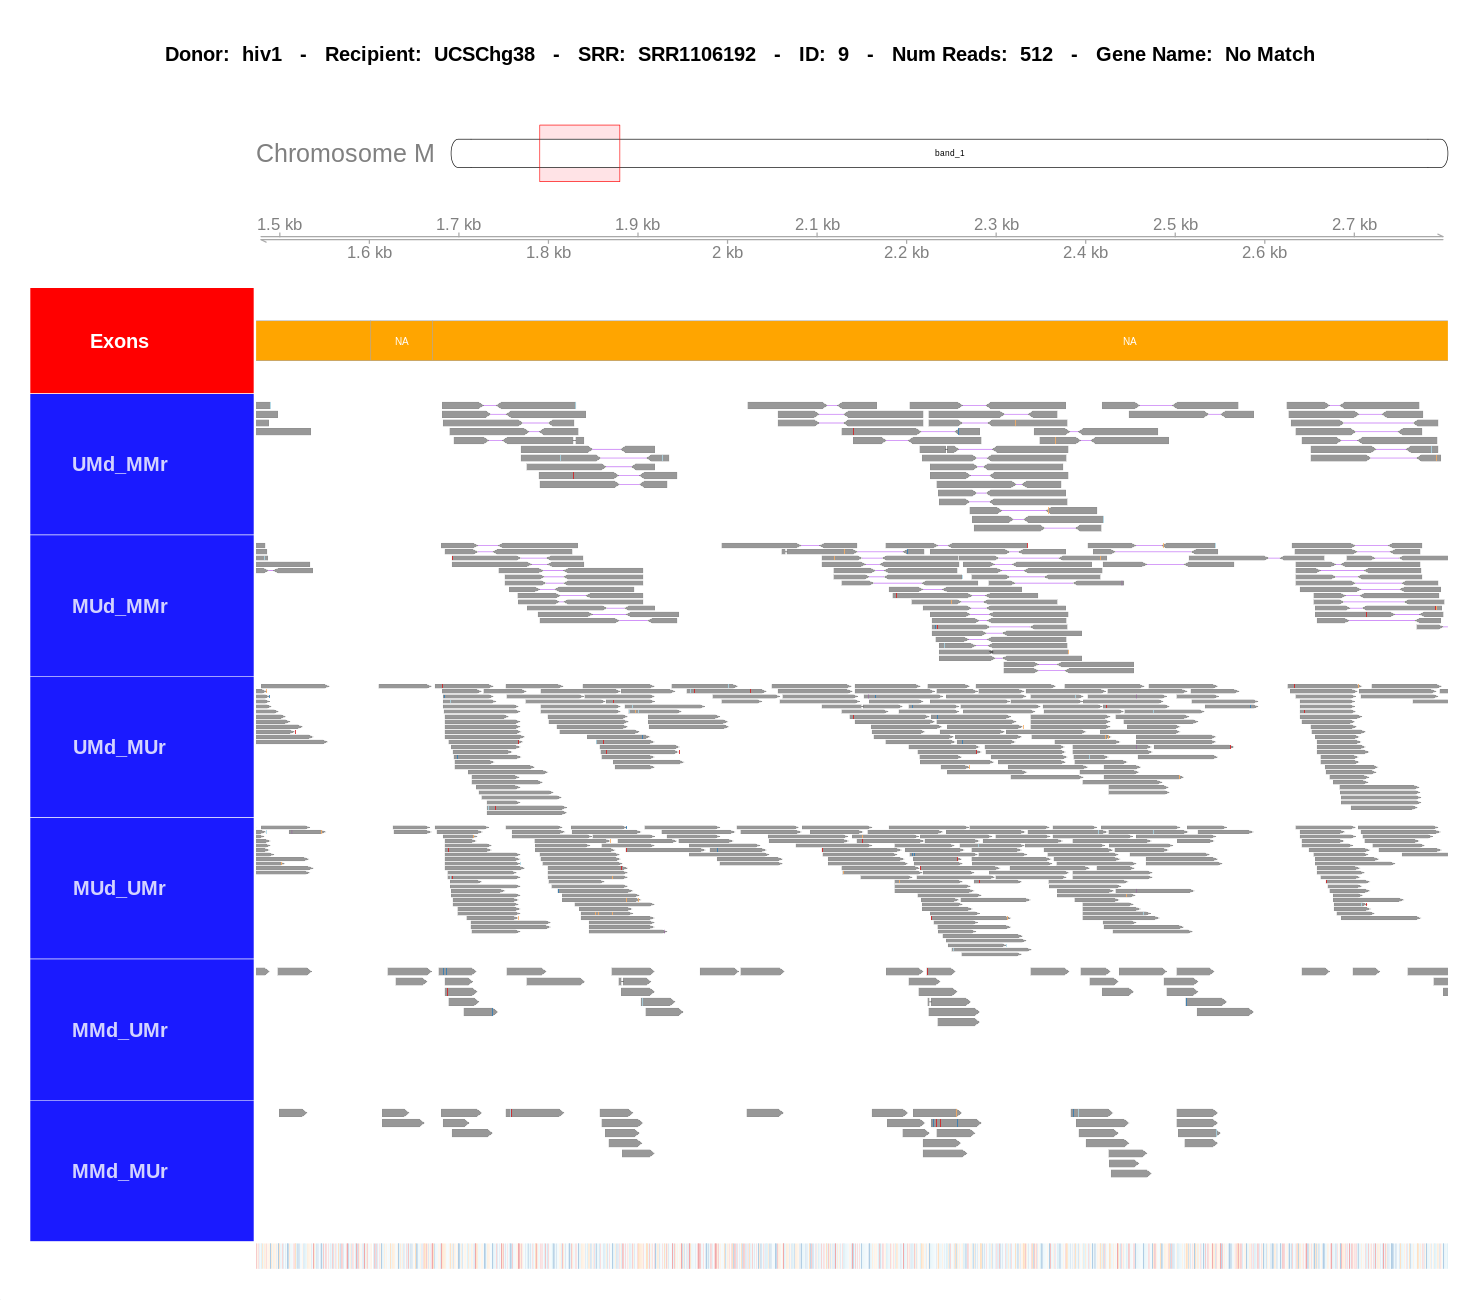

#### Crossings overlap graph - Putative insertion site

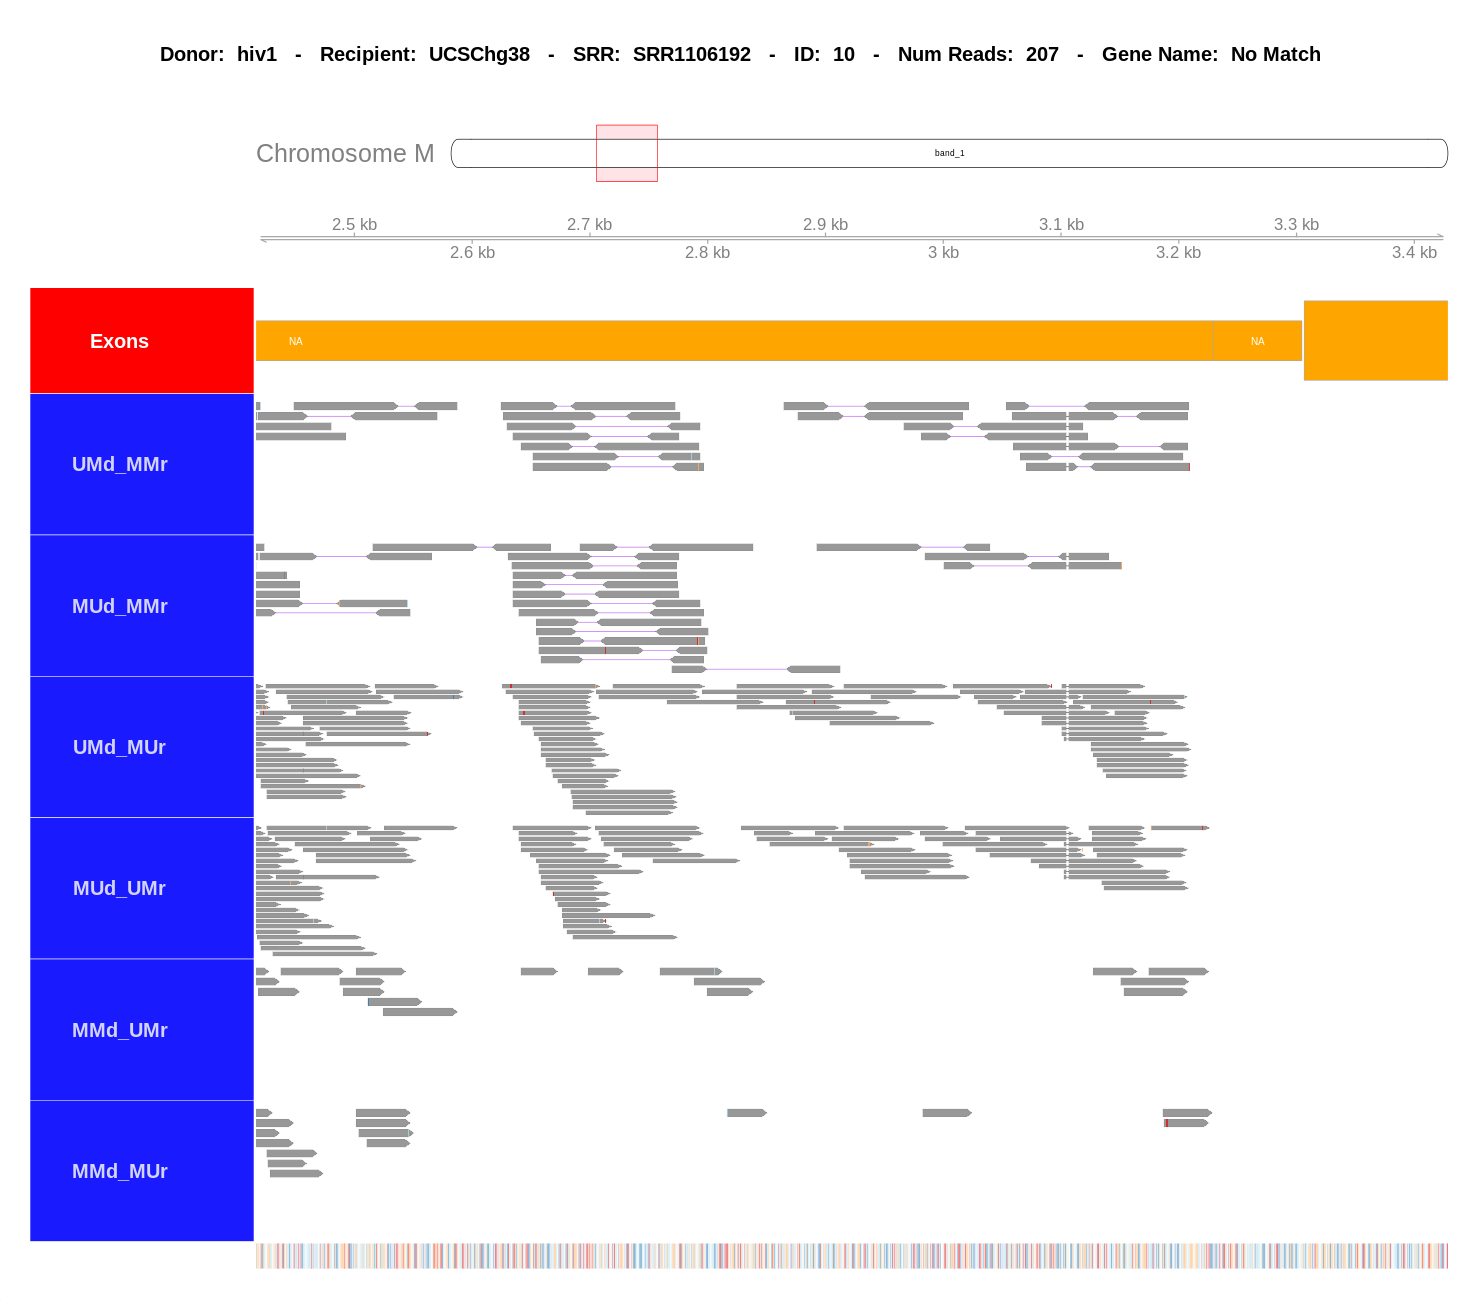

#### Crossings overlap graph - Putative insertion site

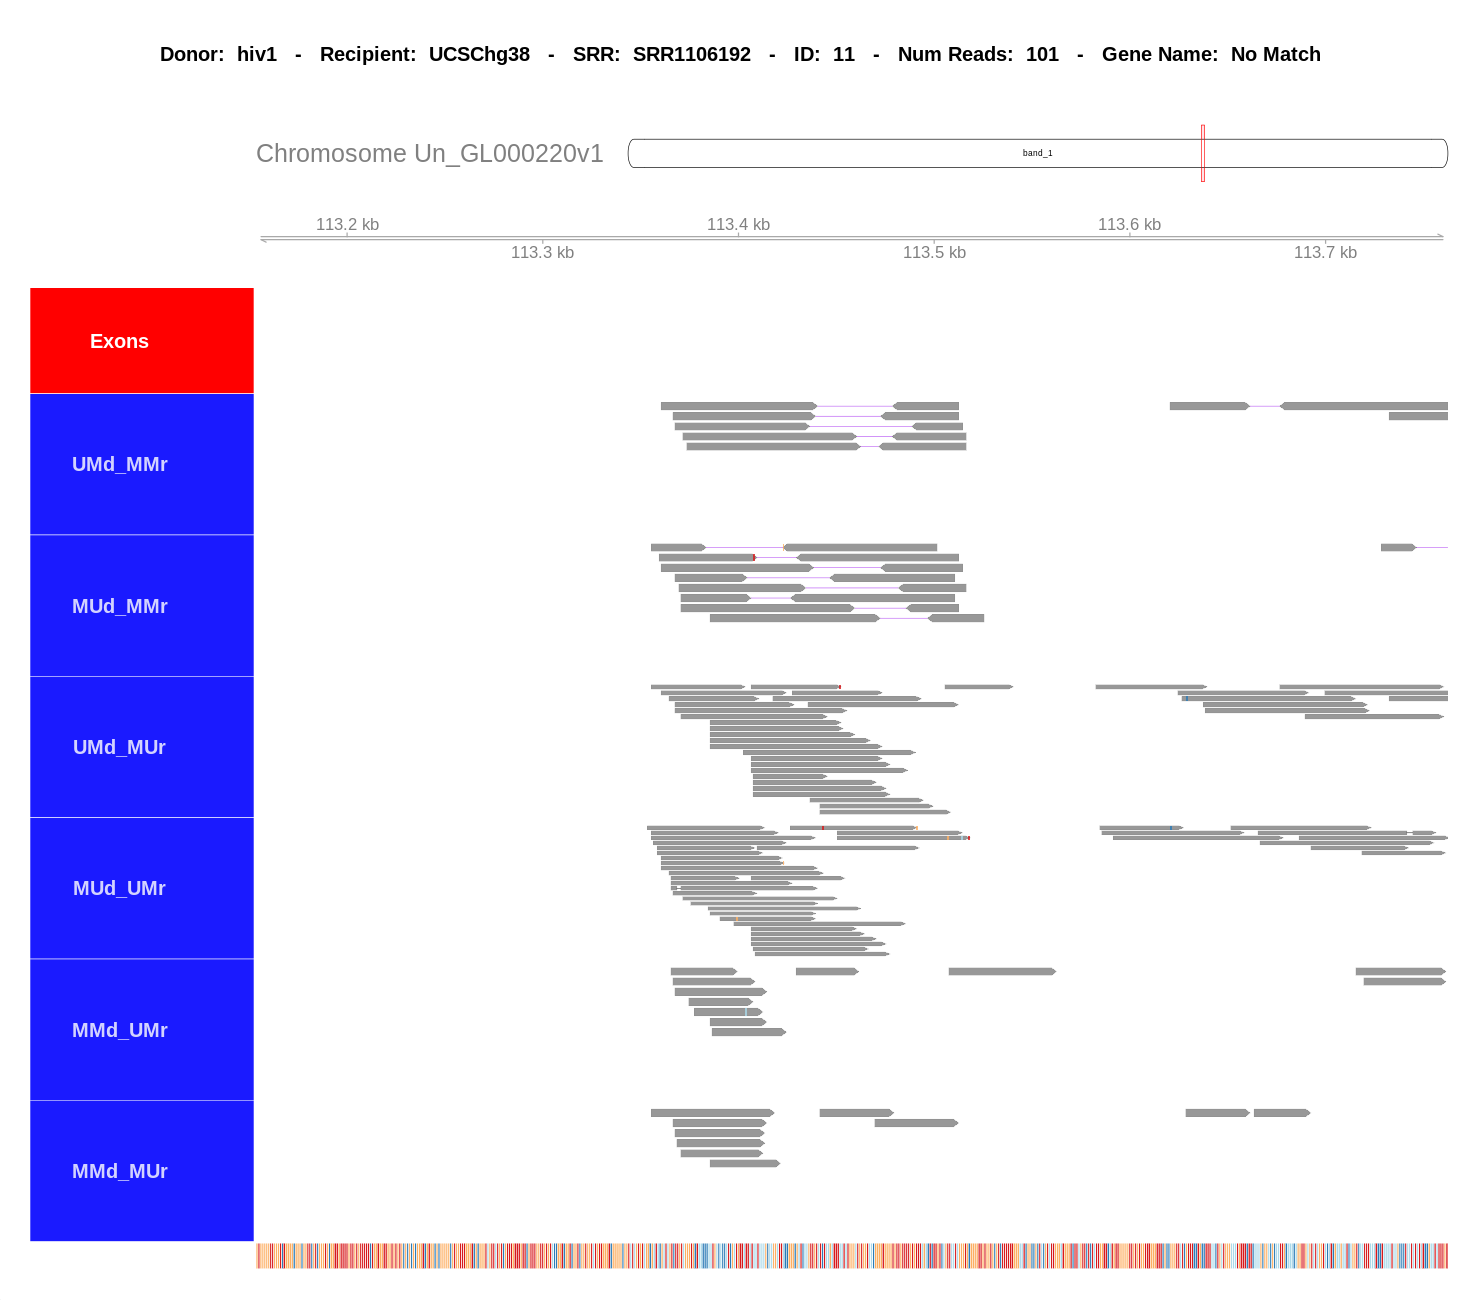

#### Crossings overlap graph - Putative insertion site

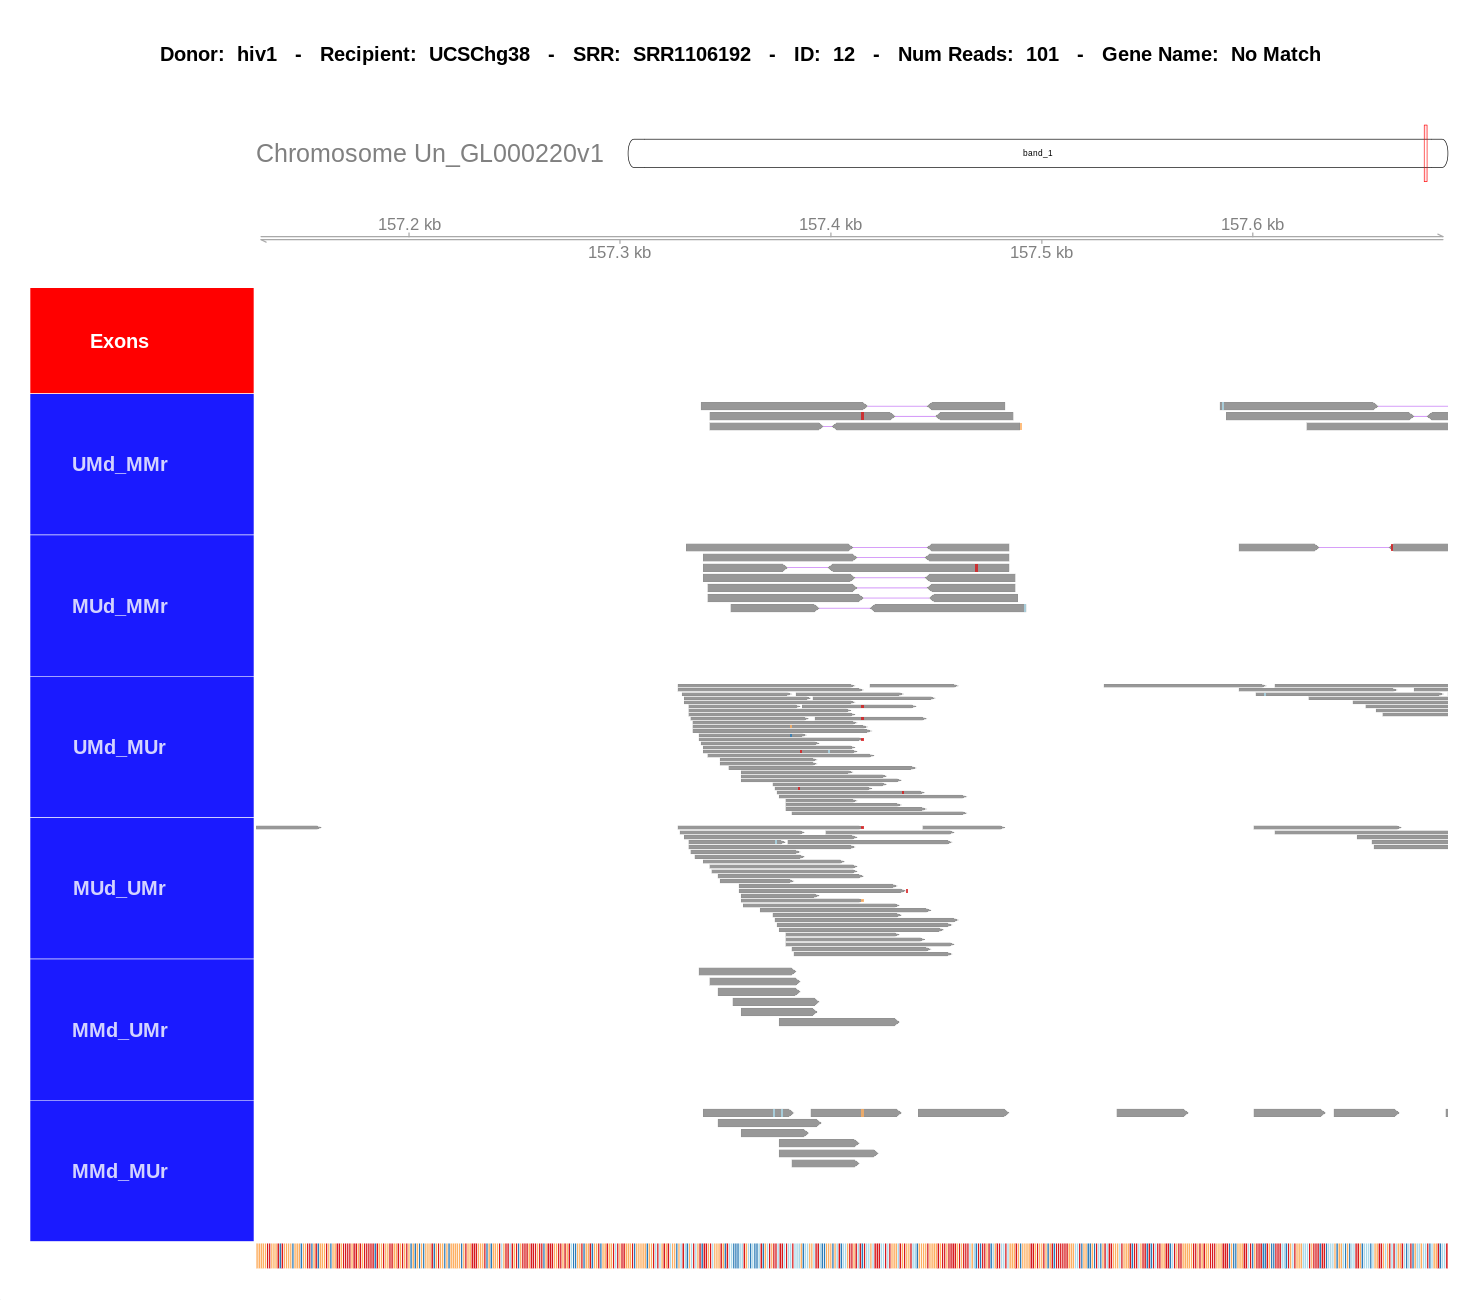

#### Crossings overlap graph - Putative insertion site

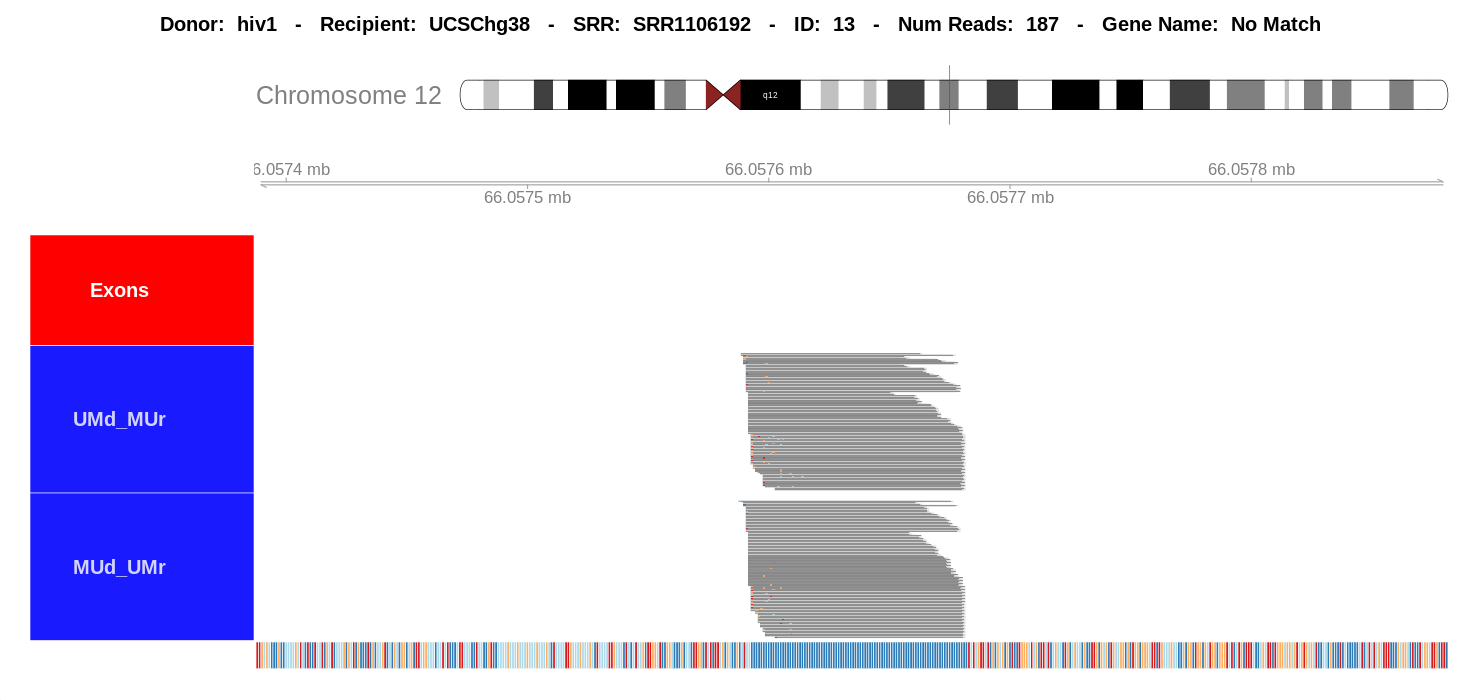

#### Crossings overlap graph - Putative insertion site

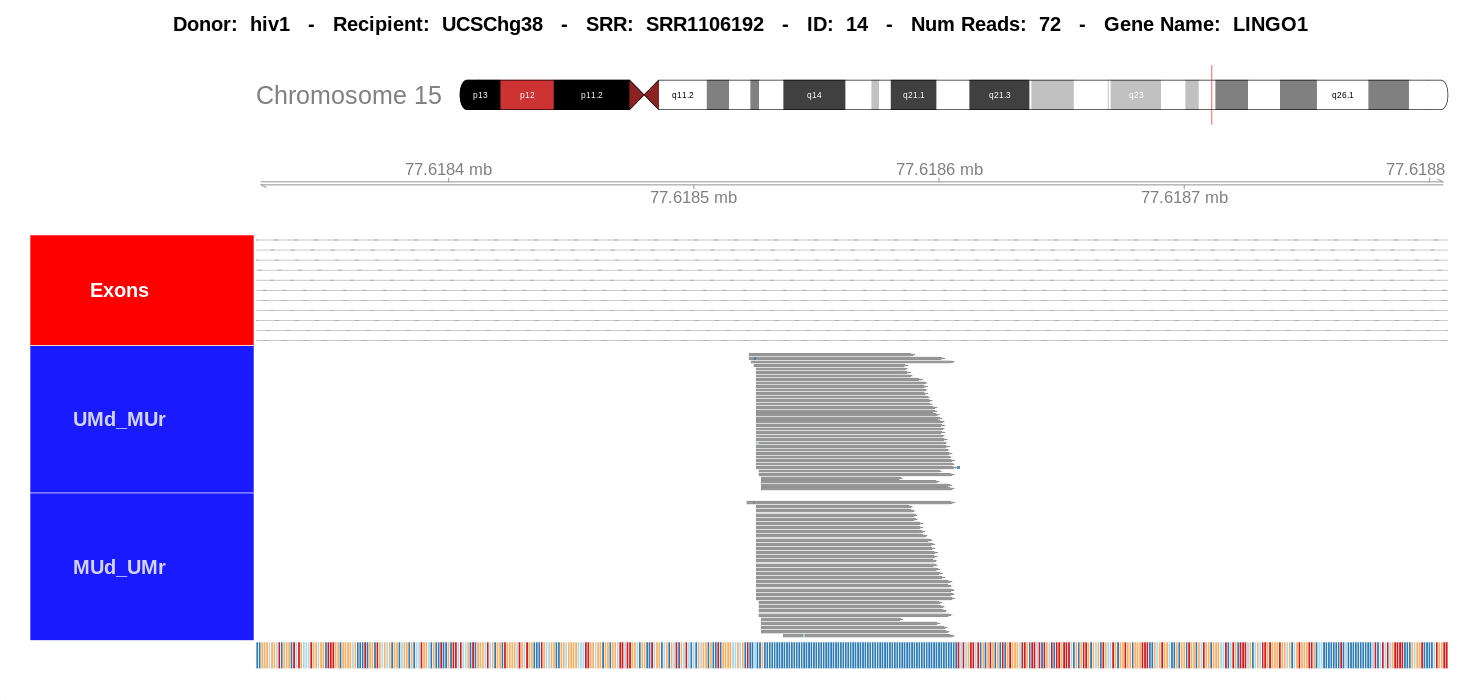

#### Crossings overlap graph - Putative insertion site

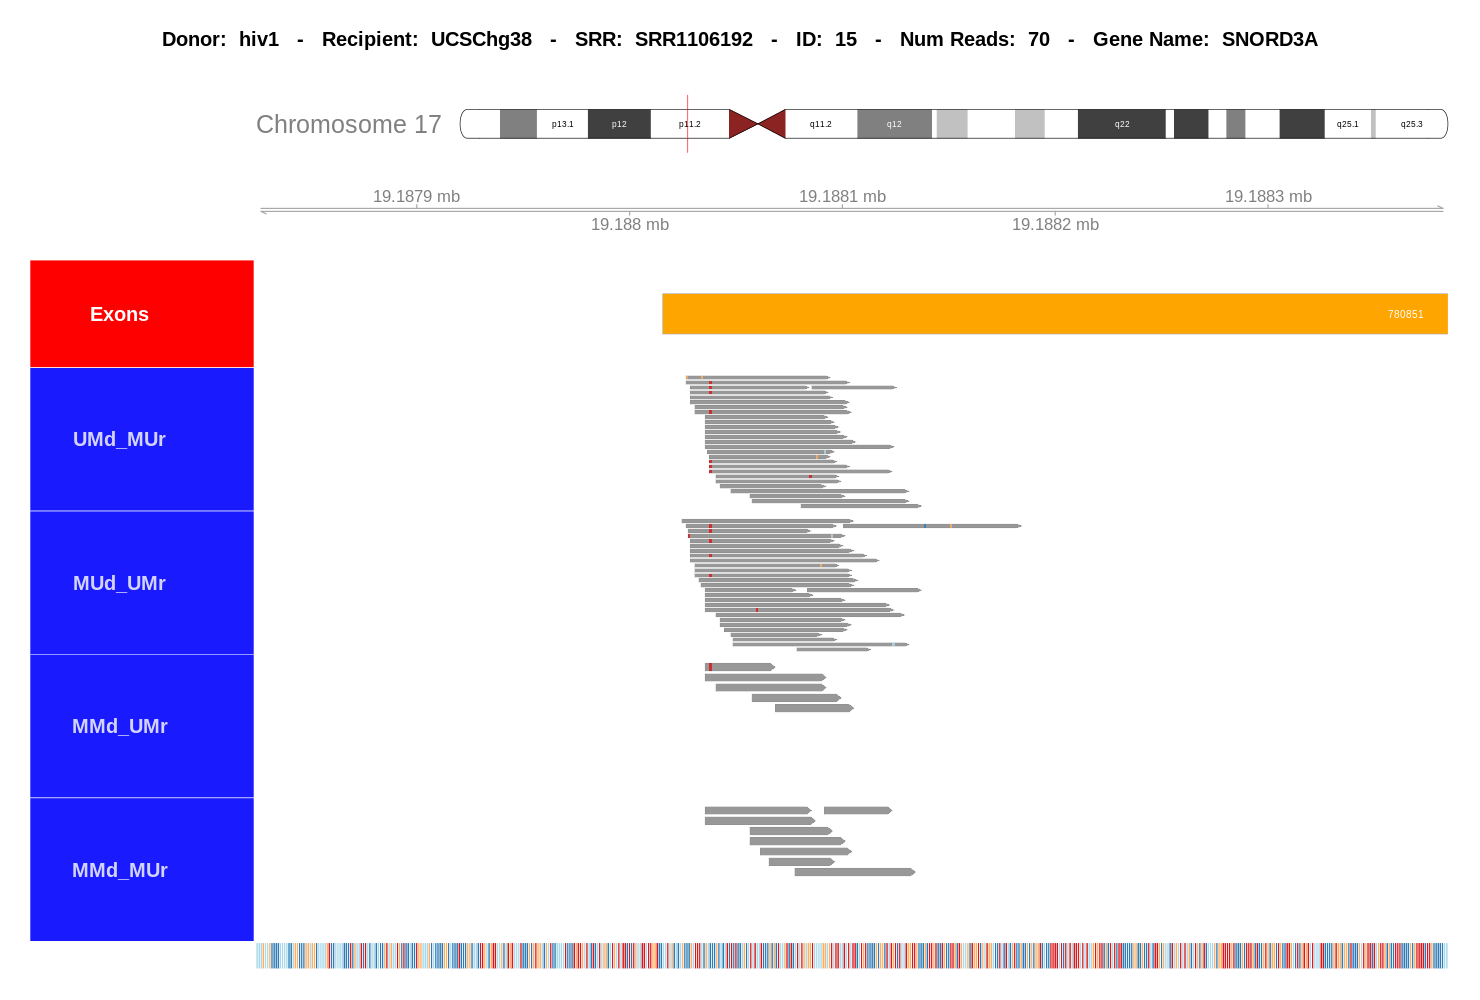

### SRR1106193

#### Donor reads density graph

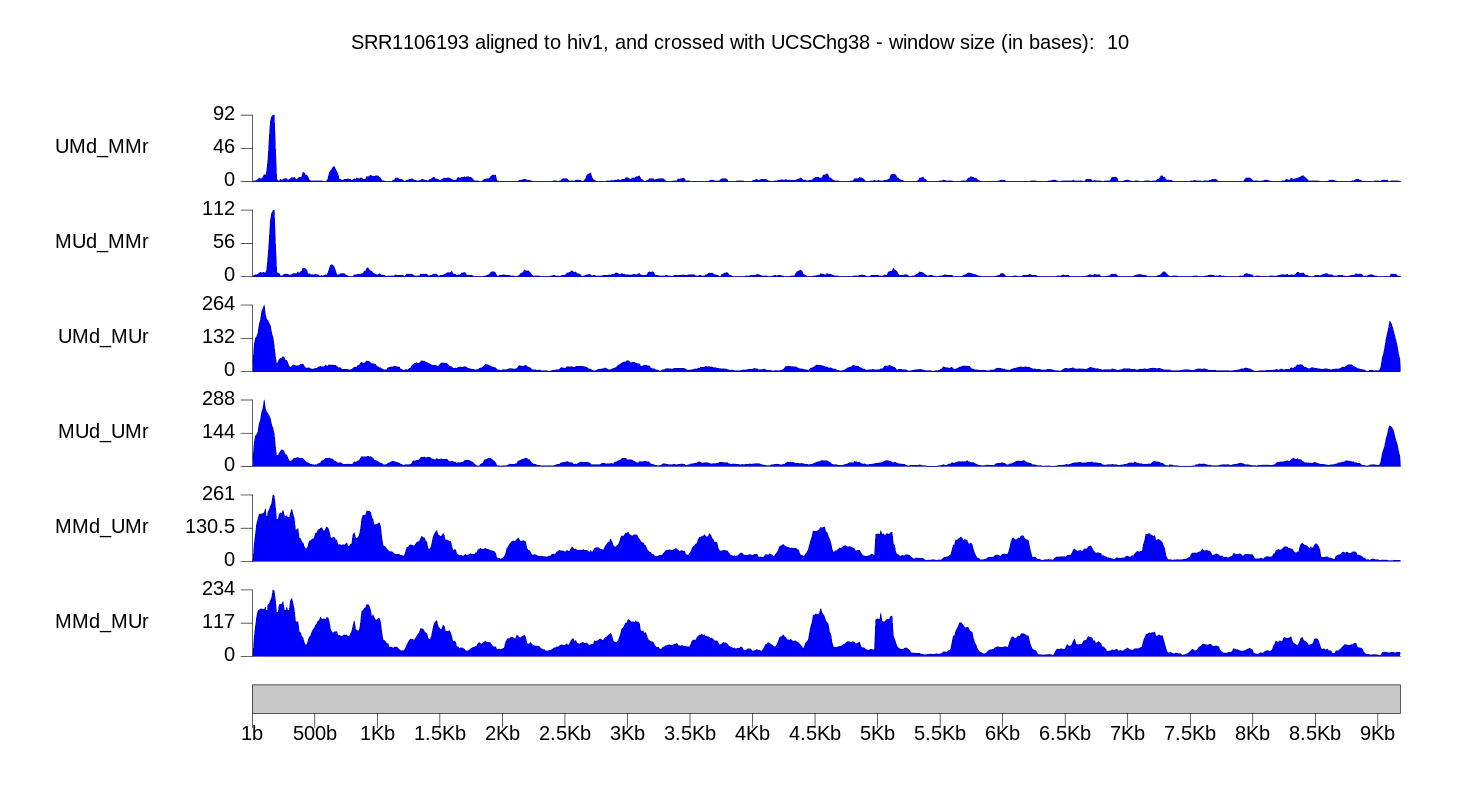

#### Recipient reads density graph

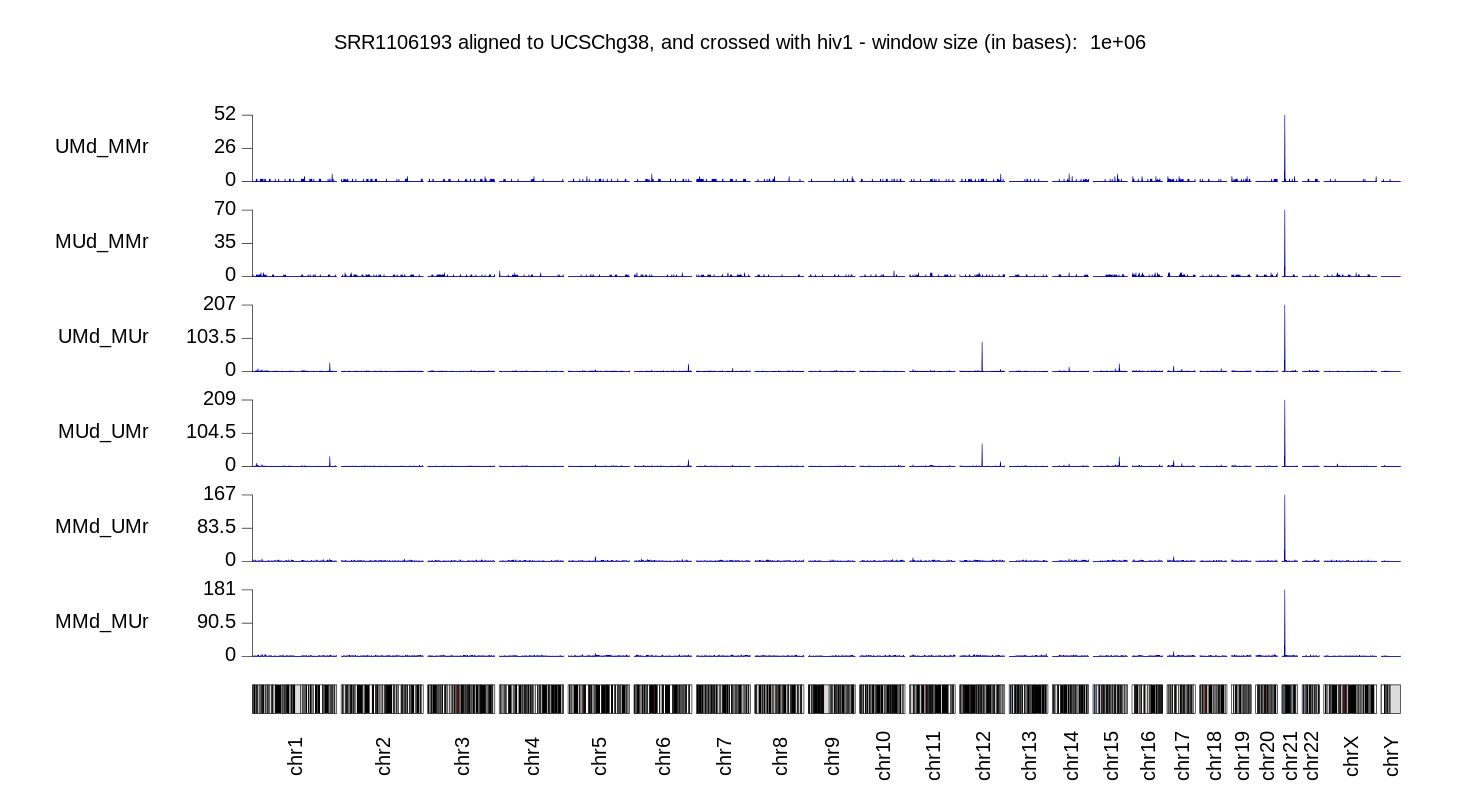

#### Crossings overlap graph - Putative insertion site

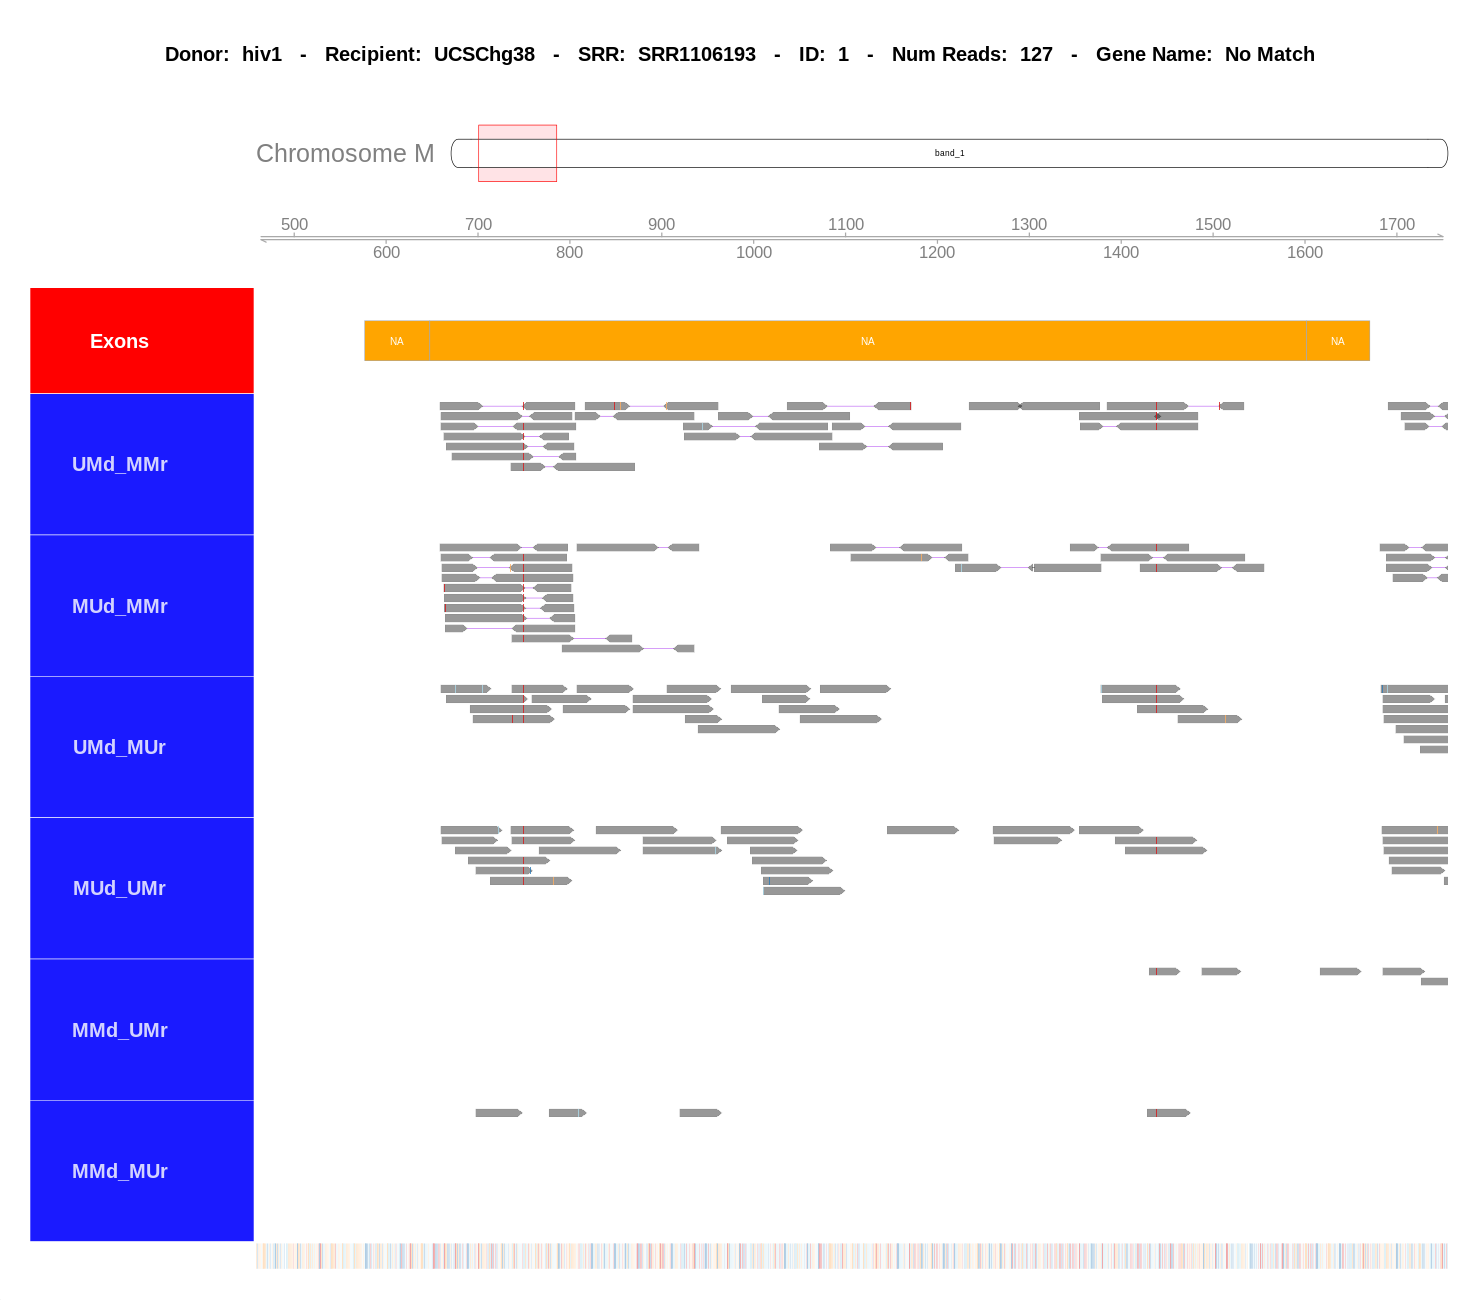

#### Crossings overlap graph - Putative insertion site

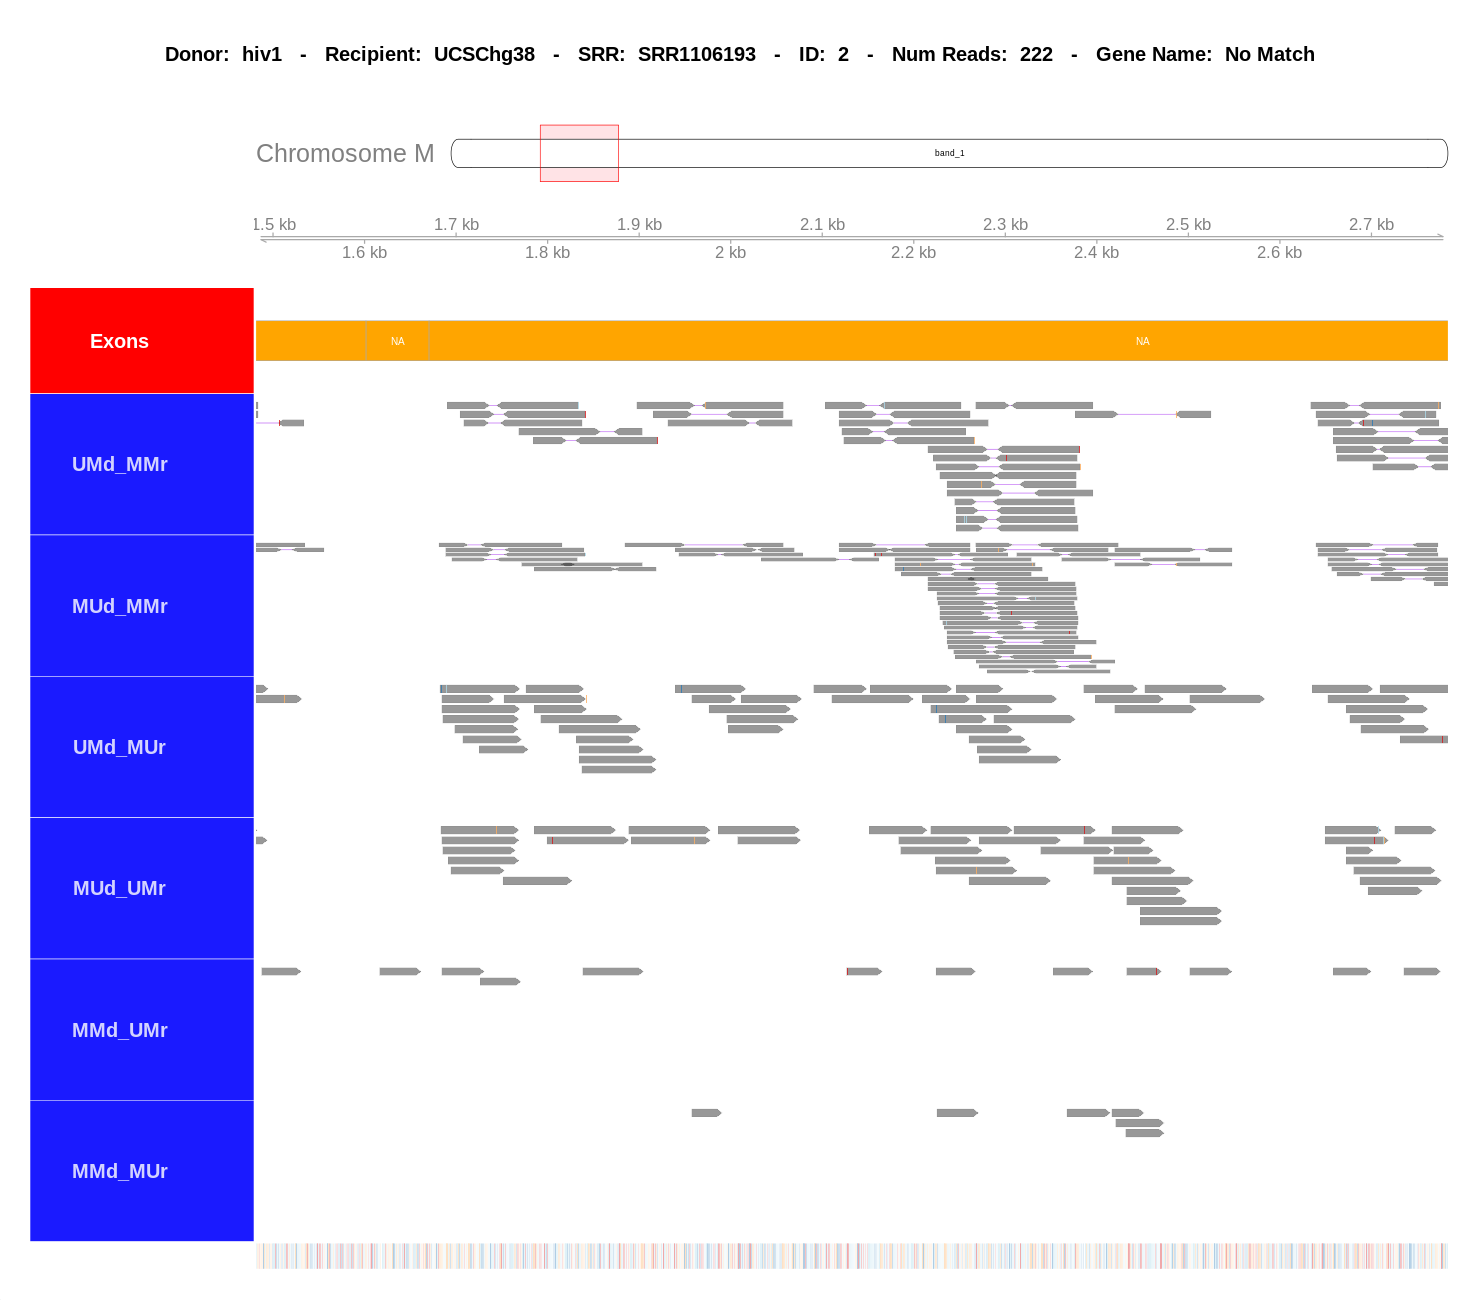

#### Crossings overlap graph - Putative insertion site

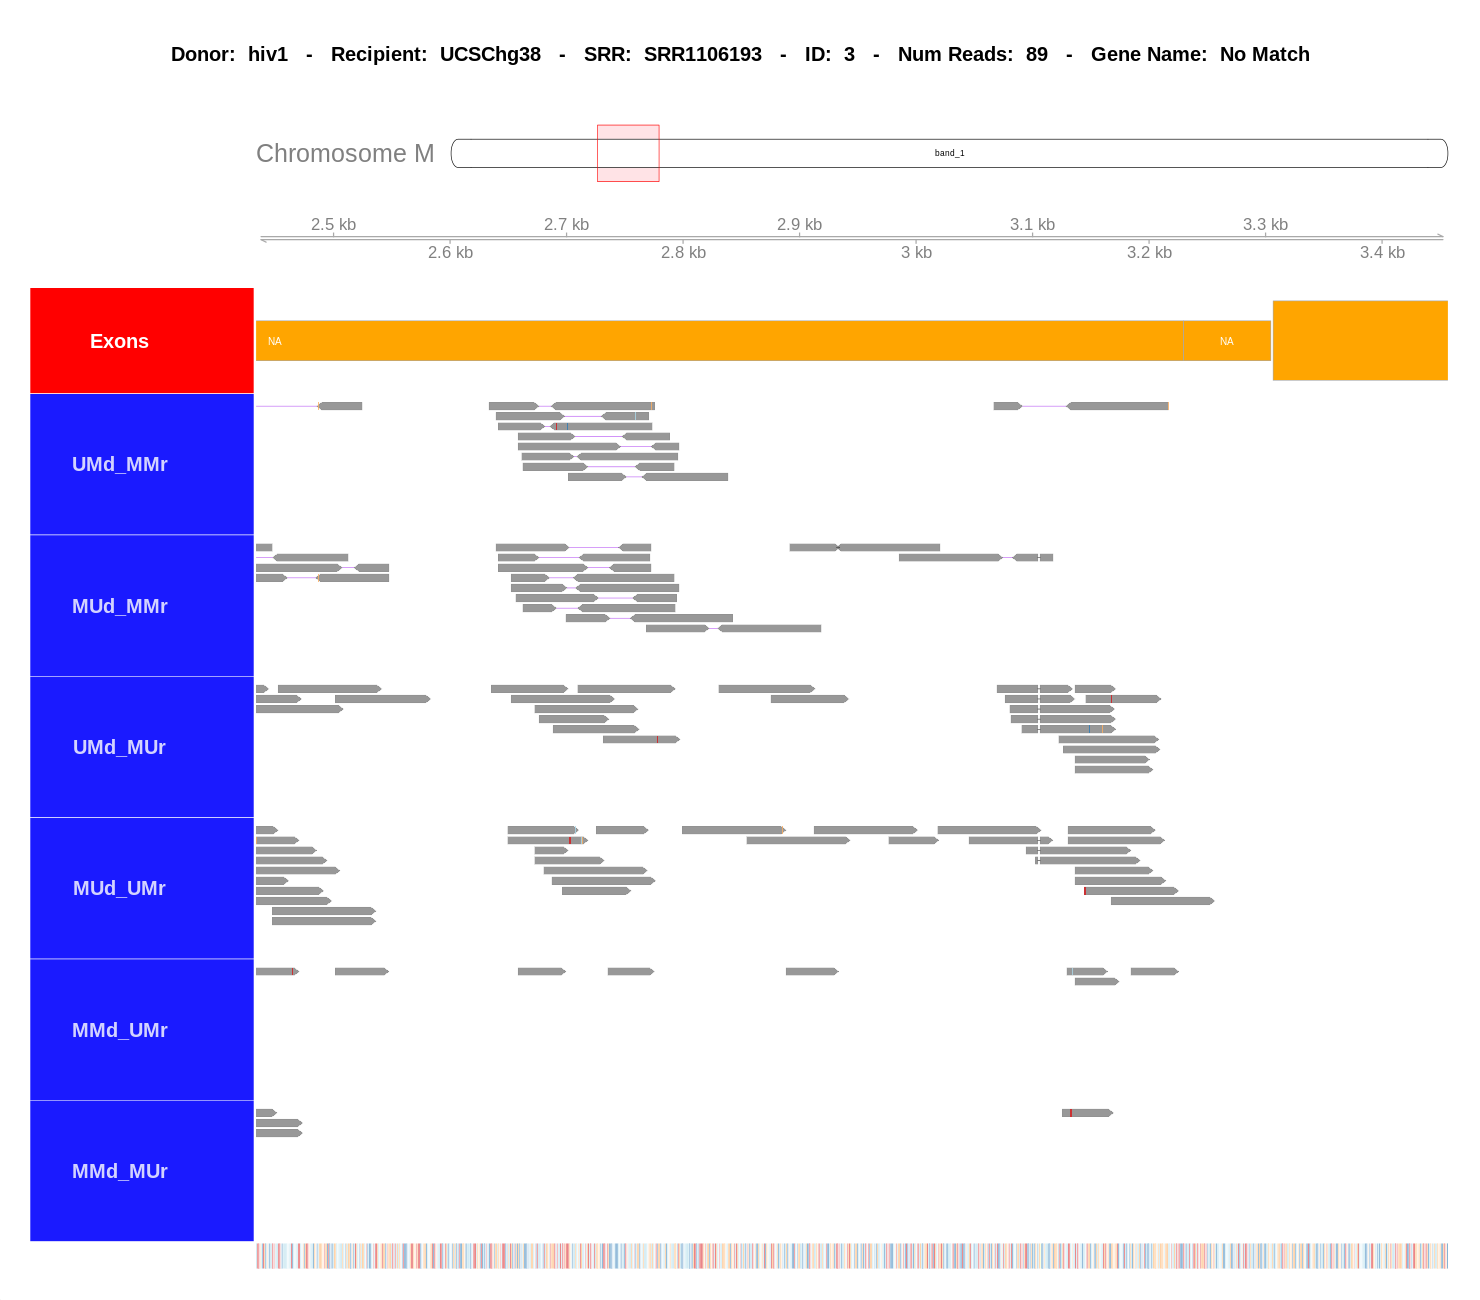

#### Crossings overlap graph - Putative insertion site

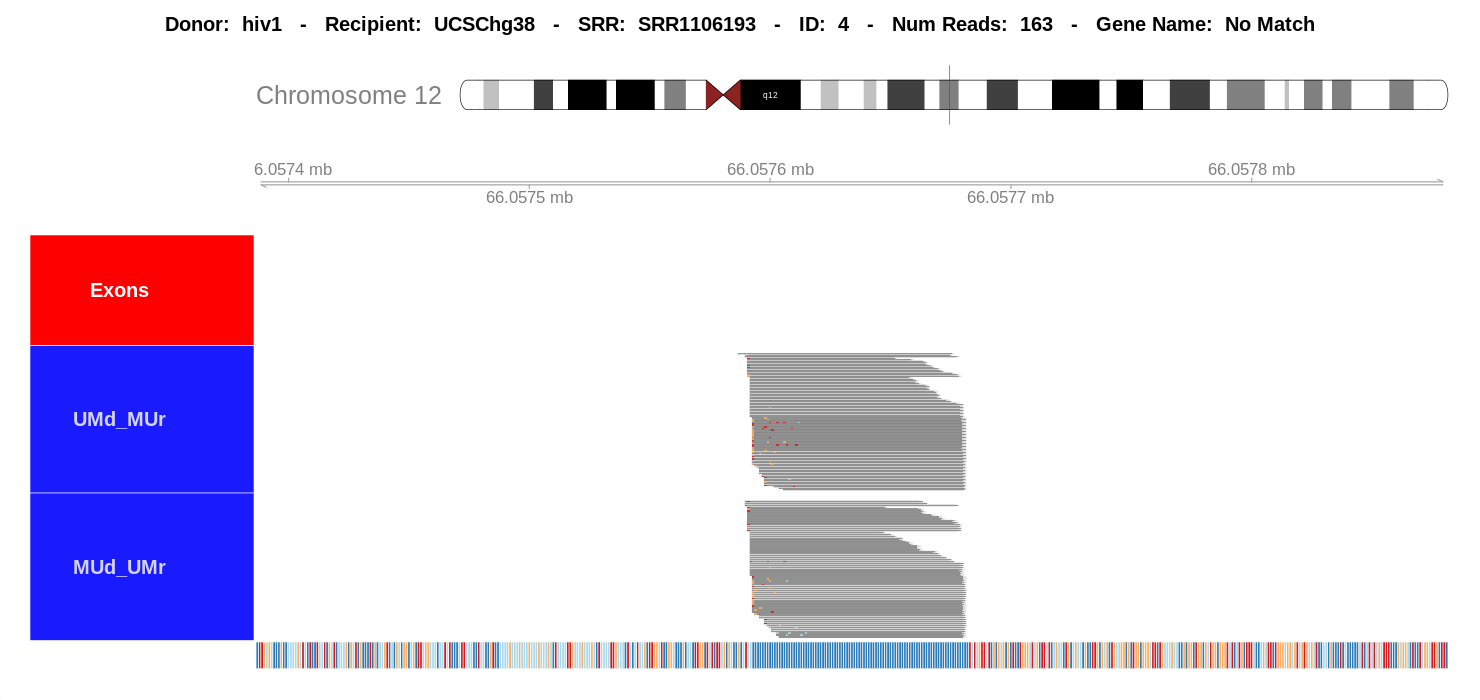

#### Crossings overlap graph - Putative insertion site

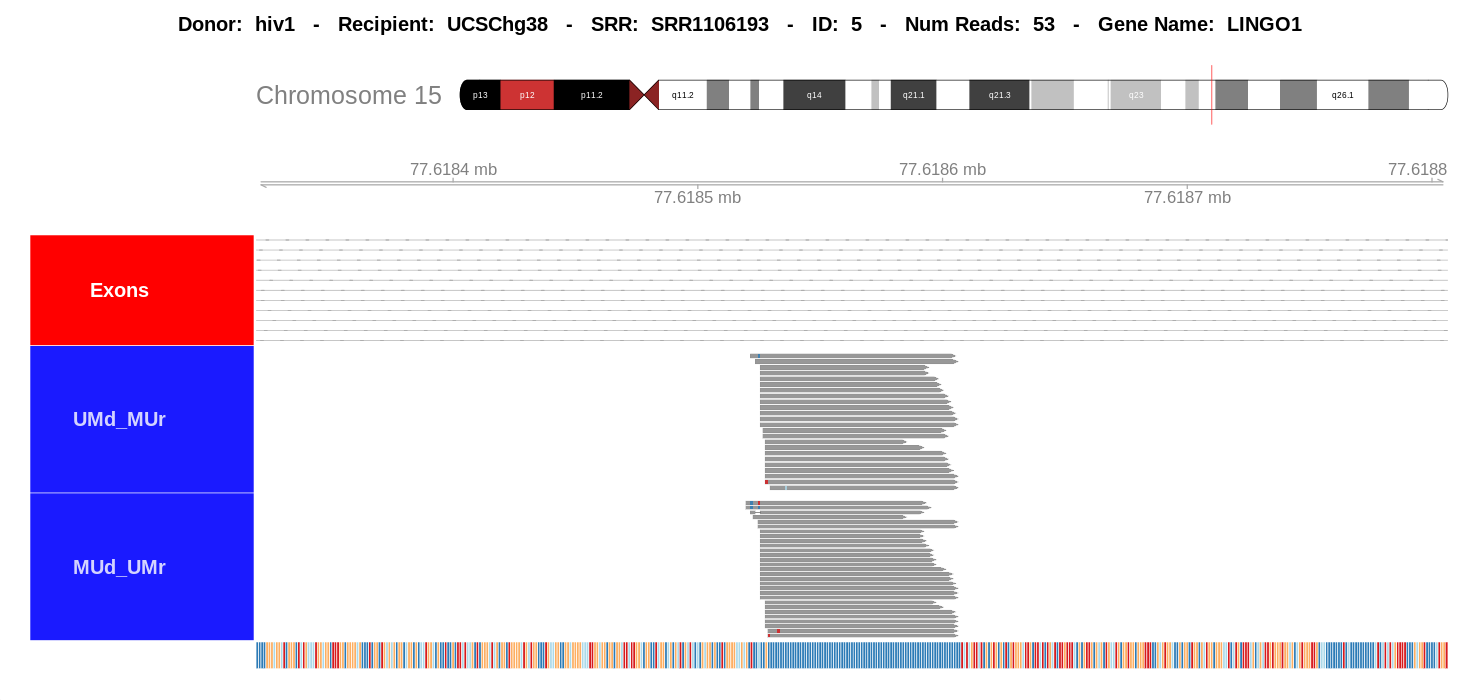

### SRR1106194

#### Donor reads density graph

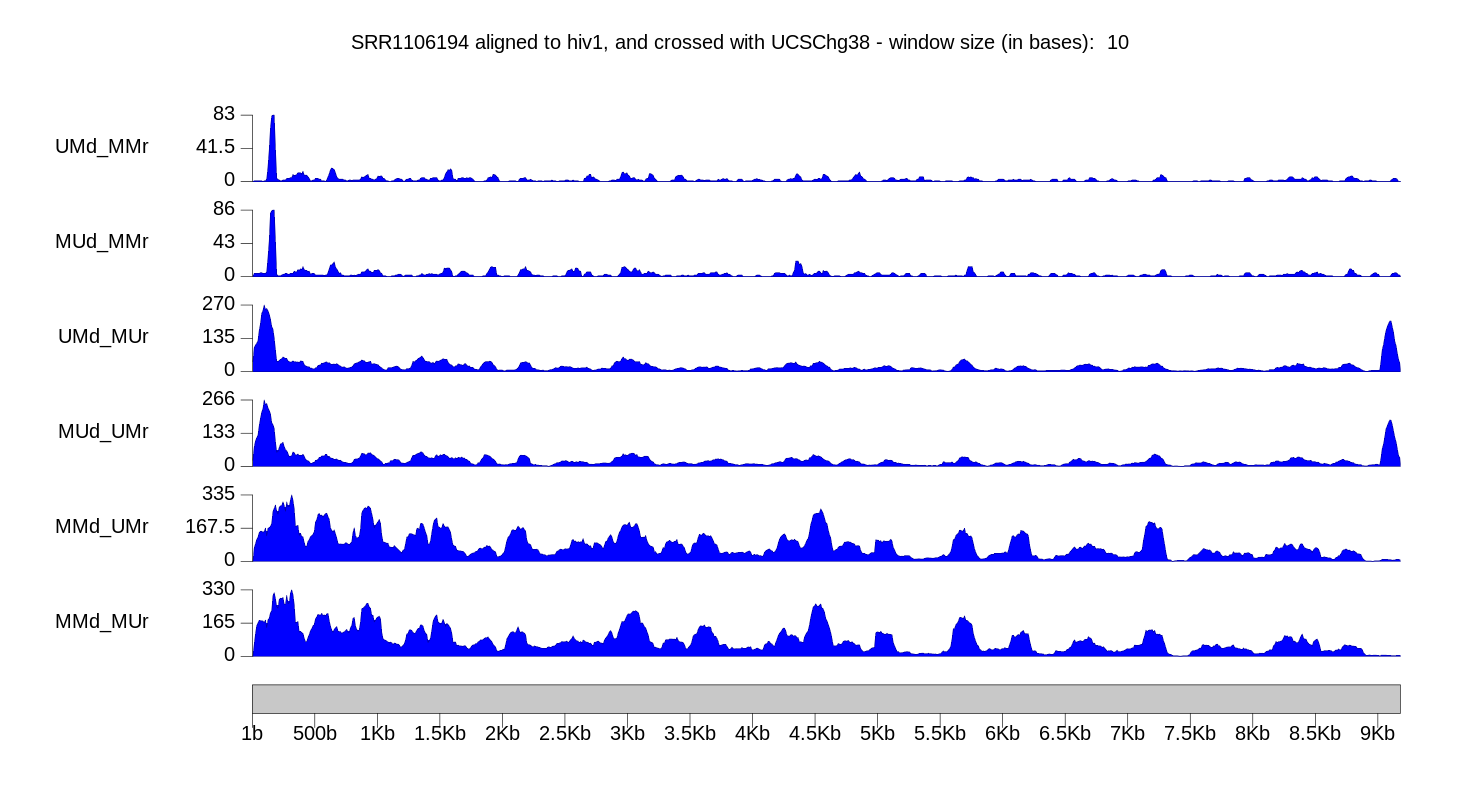

#### Recipient reads density graph

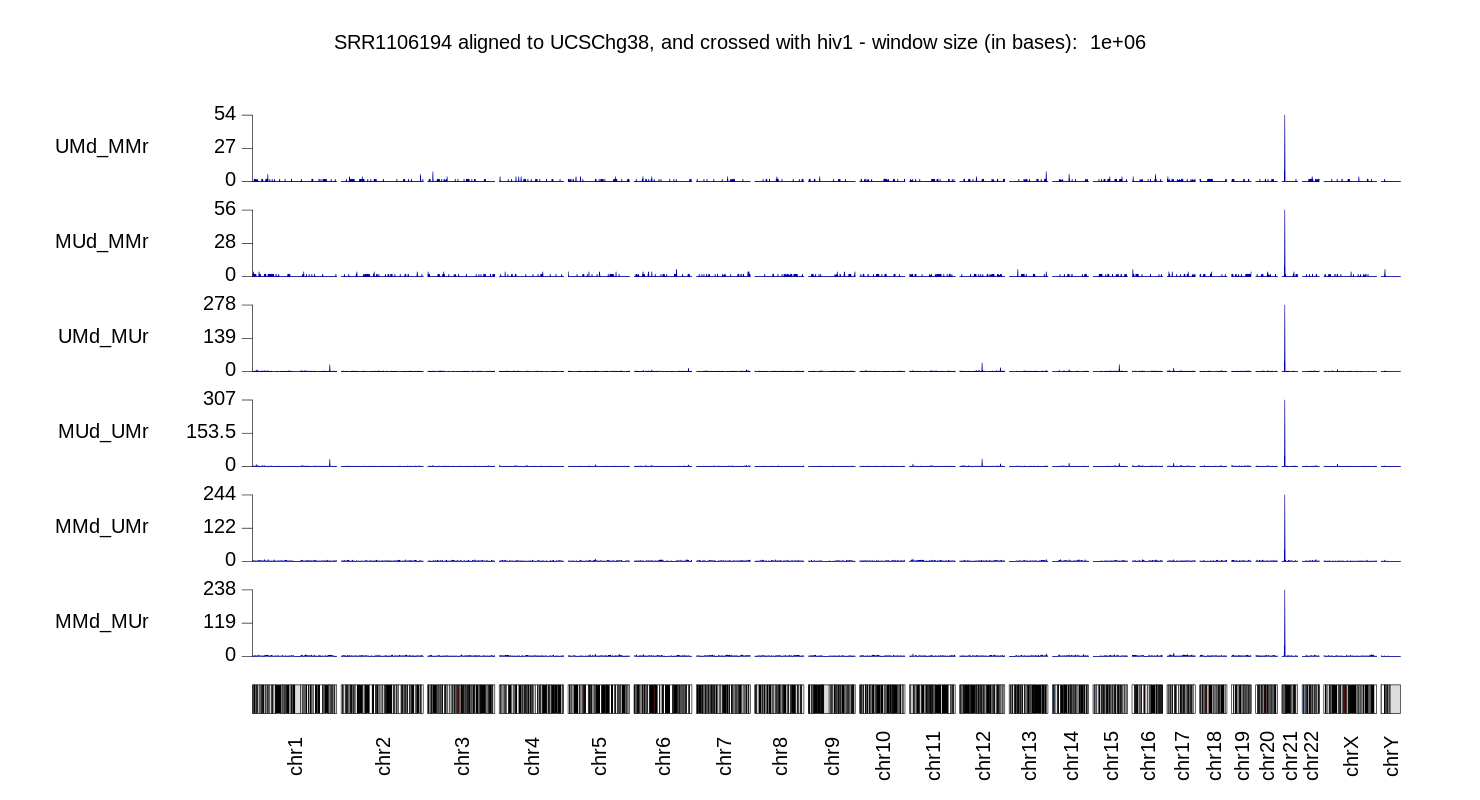

#### Crossings overlap graph - Putative insertion site

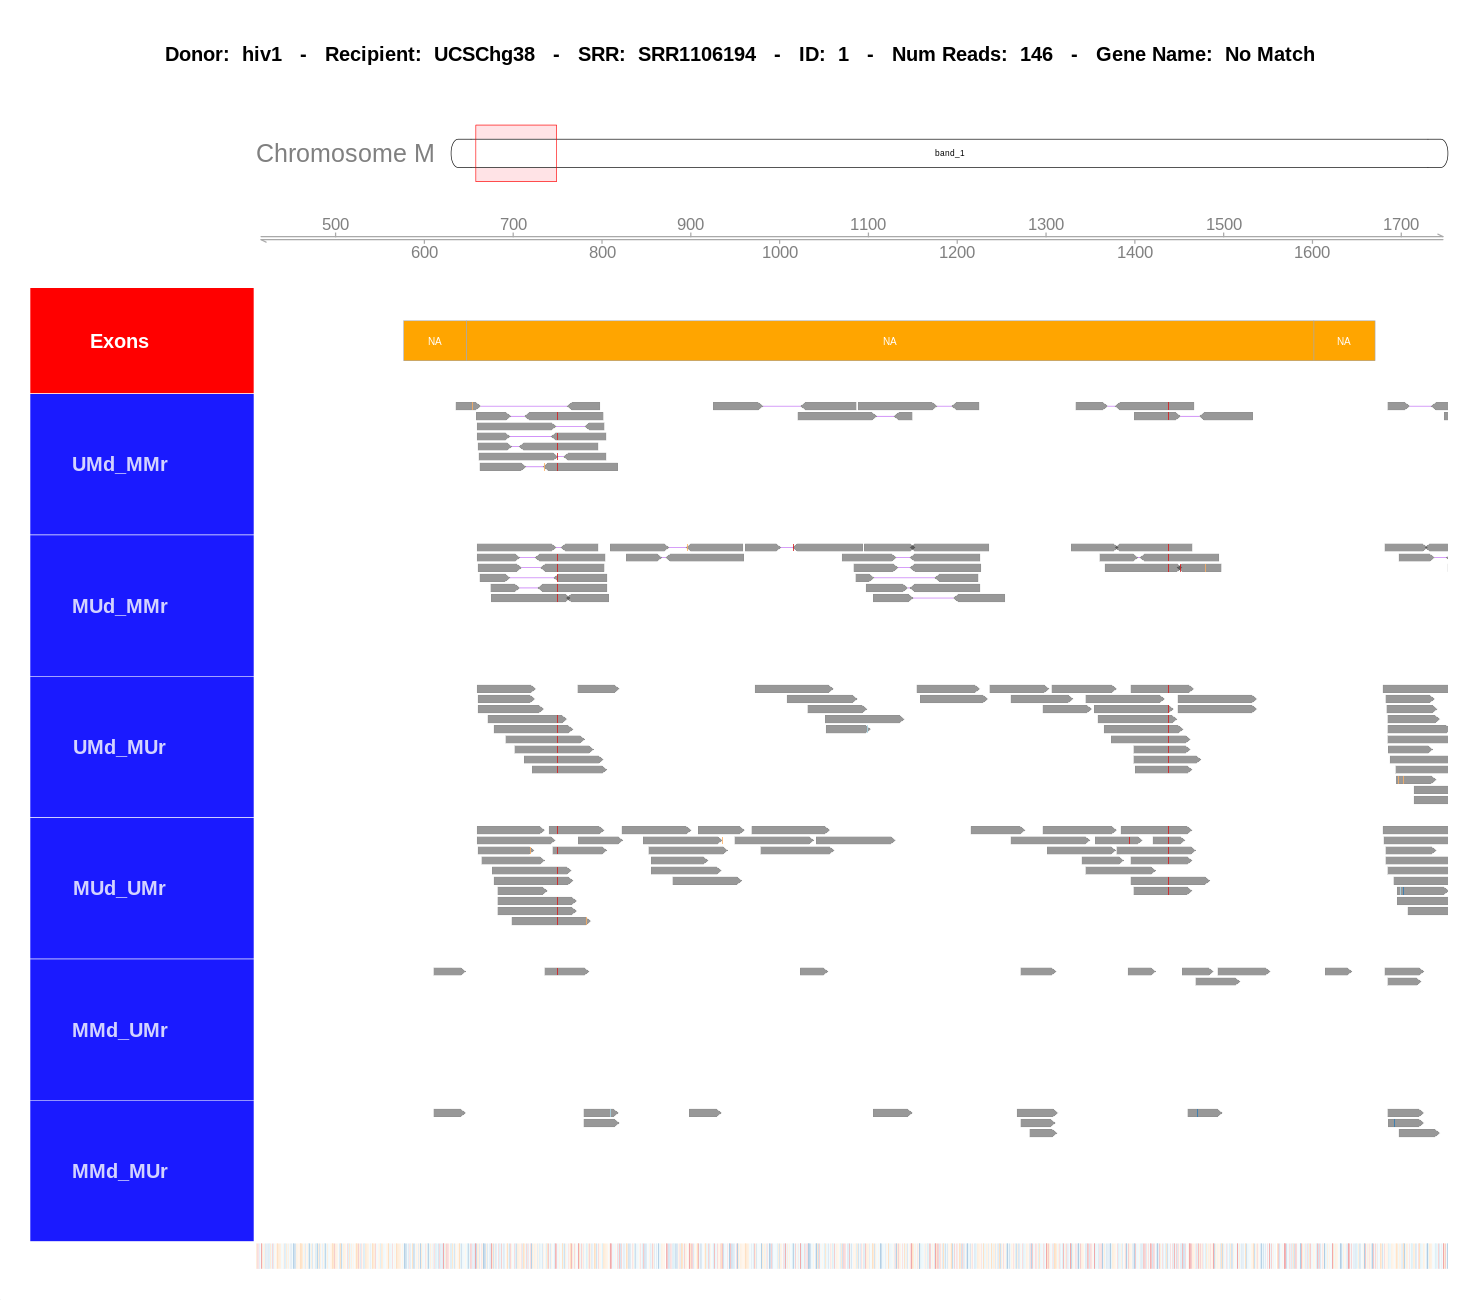

#### Crossings overlap graph - Putative insertion site

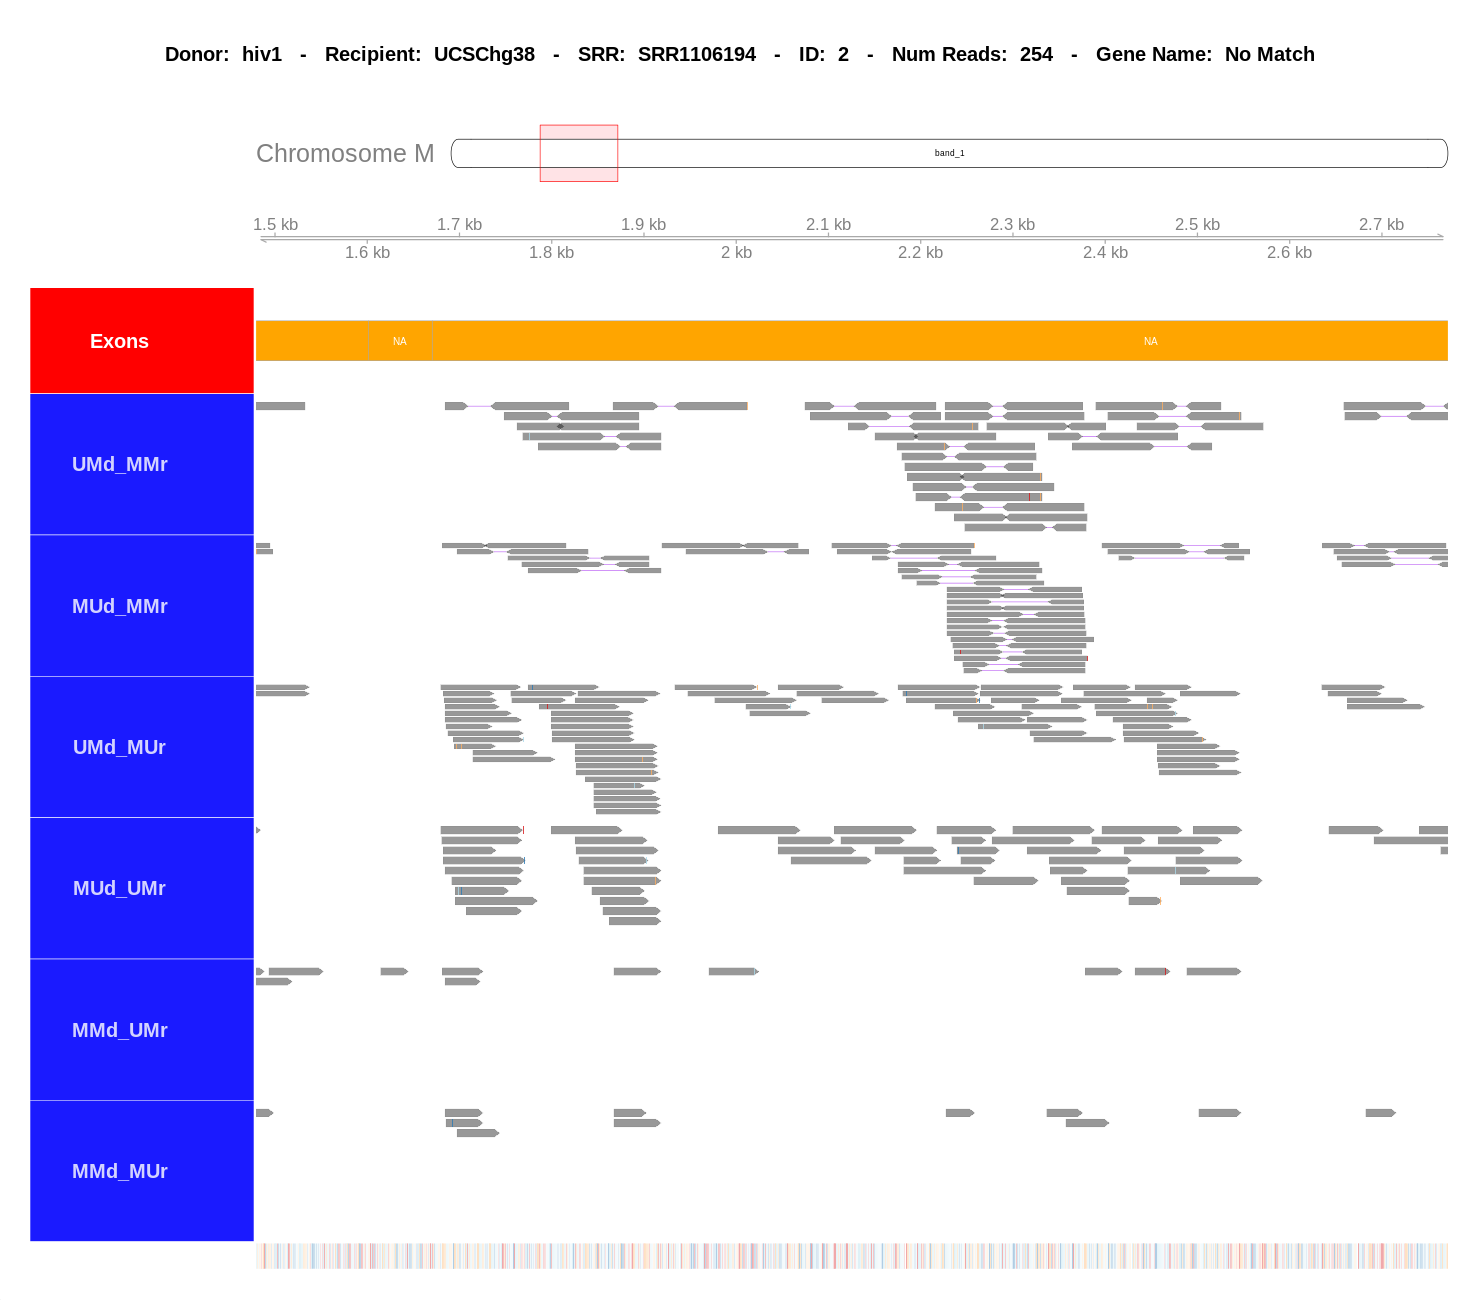

#### Crossings overlap graph - Putative insertion site

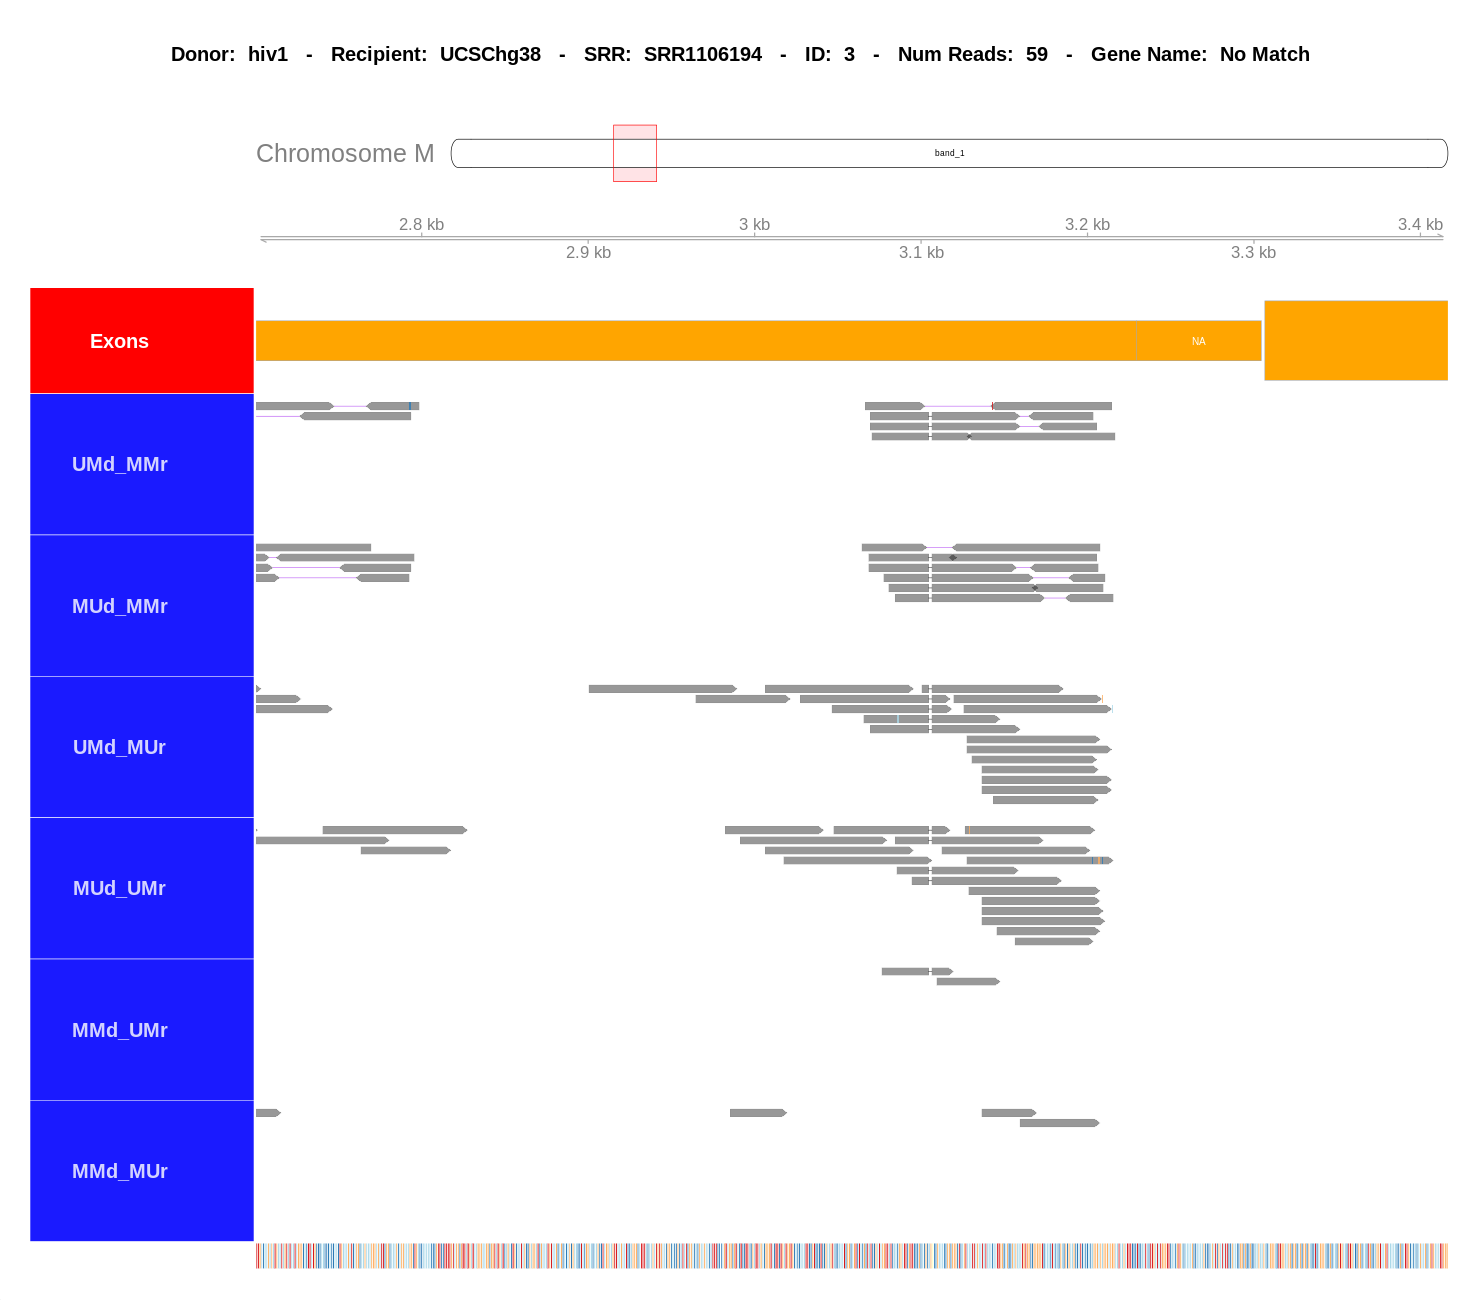

#### Crossings overlap graph - Putative insertion site

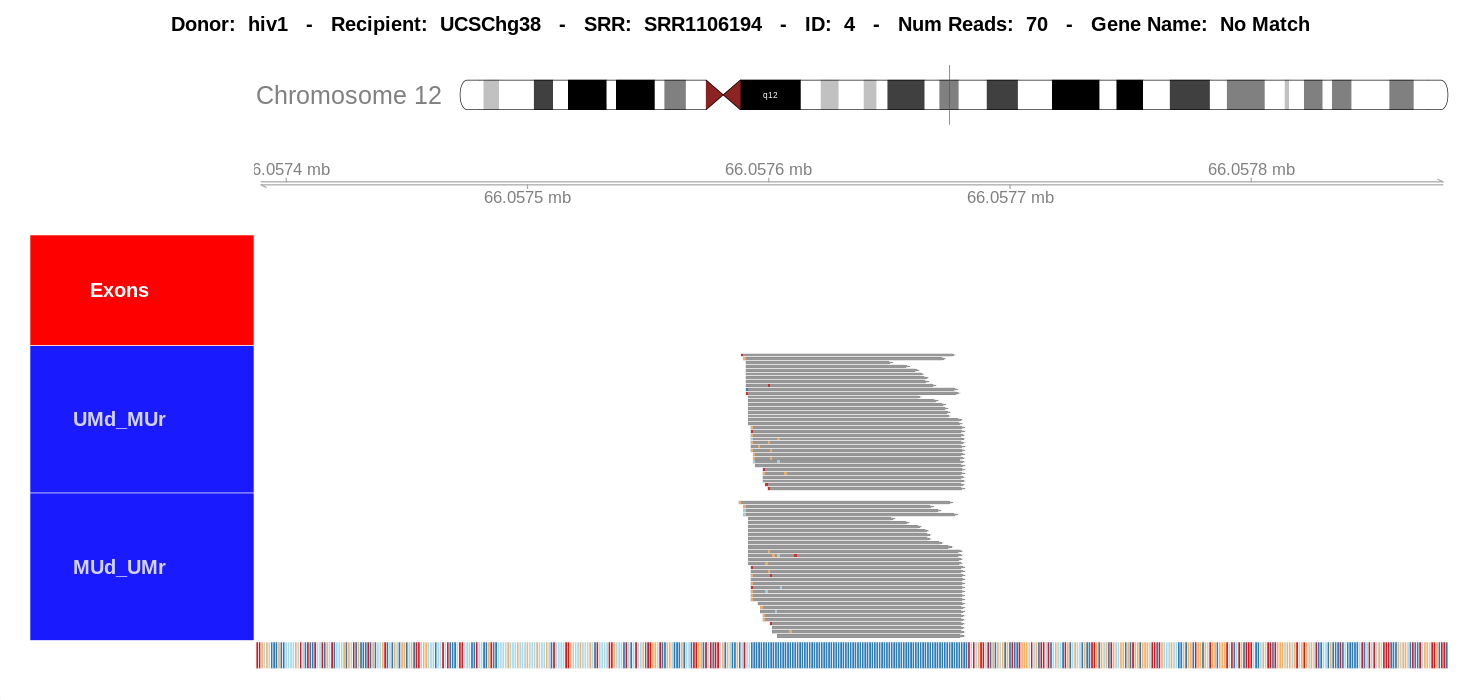

In [18]:
# Plot all the overlapping reads for all 'ids' for all 'srr's
plot_all_srrs(srr_names, srrs_summary_table, crossings, donor_granges_all_srrs, recip_granges_all_srrs, 
              recip_bams_all_srrs, donor_ref_genome, recipient_ref_genome, donor_name, recipient_name, 
              extend_left = 100, extend_right = 100)